Está pesquisa será usada para o meu TCC na conclusão do curso de engenharia elétrica ênfase Sistemas e Computação.

- Objetivo
    - Analisar os padrões de ocorrência de casos denunciados na central de atendimento no período
    de 2022 do Ministério dos Direitos Humanos .
- Objetivos Específicos
    - Selecionar, pré-processar e transformar os atributos da base de dados do MDH,
    referentes ao período 2022;
    
    
- Abaixo temos uma imagem de como será feito o processo:
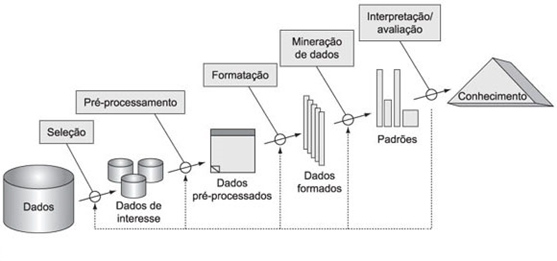
Fonte: https://danielteofilo.wordpress.com/2015/02/16/kdd-knowlegde-discovery-in-database/


- Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

- Importando a Base de Dados do Ministério Dos Direitos Humanos
- Link: https://www.gov.br/mdh/pt-br/acesso-a-informacao/dados-abertos/ligue180
- Nesta primeira fase irei utilizar os dados do 2º semestre do ano de 2022 devido a grande quantidade de dados.

In [2]:
p1_2022_df = pd.read_csv('segundo-semestre-2022.csv', sep = ',')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20,21,22,25,41,42,43,46,52,56,57) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


 - Exploração, Seleção de Dados

In [3]:
p1_2022_df

,hash,Data_de_cadastro,Canal_de_atendimento,Denúncia_emergencial,Denunciante,Cenário_da_violação,País,UF,Município,Frequência,...,Grau_de_instrução_do_suspeito,Religião_do_suspeito,Raça_Cor_do_suspeito,Suspeito_Etnia,Faixa_de_renda_do_suspeito,Vínculo_Órgão_PJ_do_suspeito,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia,violacao
0,A01A483FB2103B5AAF42FC37E45D3886E14B3528C46613...,2022-08-10 11:25:43.003,TELEFÔNICO,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,355030 | SÃO PAULO,DIARIAMENTE,...,NaN,UMBANDA E CANDOMBLÉ,NaN,PARDO,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA
1,709A353AC30598A075D04B296943139E71D5B08CEDDD1C...,2022-07-20 12:58:24.817,TELEFÔNICO,NÃO,A PRÓPRIA VÍTIMA,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,ES,320530 | VITÓRIA,DIARIAMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>MAUS TRATOS
2,35FEA1E1B00682B804F734A31C51555BA62F2722B43588...,2022-10-30 20:53:36.507,TELEFÔNICO,NÃO,TERCEIRO,CASA DA VÍTIMA,BR | BRASIL,PR,410690 | CURITIBA,DIARIAMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIREITOS SOCIAIS>PROTEÇÃO À INFÂNCIA
3,8D8F1E57FB1E3CE5AC979278CFF2DBA5AA53D42BF6B522...,2022-10-31 00:57:36.793,WHATSAPP,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,350950 | CAMPINAS,DIARIAMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>NEGLIGÊNCIA
4,2B7EAE37453B5FDA047BAB89C542BEAD752B325142CAD6...,2022-10-14 13:39:51.817,WHATSAPP,NÃO,A PRÓPRIA VÍTIMA,CASA DO SUSPEITO,BR | BRASIL,BA,291840 | JUAZEIRO,NÃO SABE INFORMAR,...,NaN,NaN,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,LIBERDADE>SEXUAL>FÍSICA>ESTUPRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,55B0CC31F50E453A1C72CBBE17C05968E5C5D39693CF81...,2022-10-02 11:27:34.573,TELEFÔNICO,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,355030 | SÃO PAULO,DIARIAMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>LESÃO CORPORAL
1048571,35174A18531F4B6B202A63555A26FA076ED433B69E44EA...,2022-11-08 15:16:46.640,TELEFÔNICO,RISCO IMINENTE DE MORTE DA VÍTIMA,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,354390 | RIO CLARO,DIARIAMENTE,...,NaN,NaN,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>MAUS TRATOS
1048572,742F2D6E0D11B2E7878723B92C58E936FECA08F15BC965...,2022-10-20 07:48:32.287,WHATSAPP,NÃO,TERCEIRO,CASA DA VÍTIMA,BR | BRASIL,SP,351880 | GUARULHOS,DIARIAMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA
1048573,C99771C8758A6500EC874AC05F0302C41A7E6986698DDA...,2022-08-30 12:12:17.033,TELEFÔNICO,NÃO,TERCEIRO,CASA DO SUSPEITO,BR | BRASIL,RJ,330340 | NOVA FRIBURGO,SEMANALMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA


In [3]:
p1_2022_df['Data_de_cadastro'] = pd.to_datetime(p1_2022_df['Data_de_cadastro'])

In [4]:
# Extraindo a data
p1_2022_df['date'] = p1_2022_df['Data_de_cadastro'].dt.date

# Etraindo a hora
p1_2022_df['time'] = p1_2022_df['Data_de_cadastro'].dt.time

# extraindo a data e colocando como texto 
p1_2022_df['month'] = p1_2022_df['Data_de_cadastro'].dt.month
p1_2022_df['month'] = p1_2022_df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto',
                                          'Setembro','Outubro','Novembro','Dezembro'))

# Extraindo a hora
p1_2022_df['hour'] = p1_2022_df['Data_de_cadastro'].dt.hour

# Mudando para texto
hour_in_num = (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
p1_2022_df['hour'] = p1_2022_df['hour'].replace(hour_in_num, hour_in_obj)

# Mudando os dias da semana 
p1_2022_df['weekday'] = p1_2022_df['Data_de_cadastro'].dt.weekday
p1_2022_df['weekday'] = p1_2022_df['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Segunda','Terça','Quarta','Quinta','Sexta','Sabado','Domingo'))

# Excluindo a coluna original
p1_2022_df.drop('Data_de_cadastro', axis = 1, inplace = True)

In [6]:
p1_2022_df

,hash,Canal_de_atendimento,Denúncia_emergencial,Denunciante,Cenário_da_violação,País,UF,Município,Frequência,Início_das_violações,...,Vínculo_Órgão_PJ_do_suspeito,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia,violacao,date,time,month,hour,weekday
0,A01A483FB2103B5AAF42FC37E45D3886E14B3528C46613...,TELEFÔNICO,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,355030 | SÃO PAULO,DIARIAMENTE,HÁ MAIS DE SEIS MESES,...,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA,2022-08-10,11:25:43.003000,Agosto,11-12,Quarta
1,709A353AC30598A075D04B296943139E71D5B08CEDDD1C...,TELEFÔNICO,NÃO,A PRÓPRIA VÍTIMA,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,ES,320530 | VITÓRIA,DIARIAMENTE,HÁ MAIS DE UM ANO,...,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>MAUS TRATOS,2022-07-20,12:58:24.817000,Julho,12-13,Quarta
2,35FEA1E1B00682B804F734A31C51555BA62F2722B43588...,TELEFÔNICO,NÃO,TERCEIRO,CASA DA VÍTIMA,BR | BRASIL,PR,410690 | CURITIBA,DIARIAMENTE,HÁ MAIS DE UM ANO,...,NaN,NaN,NaN,NaN,DIREITOS SOCIAIS>PROTEÇÃO À INFÂNCIA,2022-10-30,20:53:36.507000,Outubro,20-21,Domingo
3,8D8F1E57FB1E3CE5AC979278CFF2DBA5AA53D42BF6B522...,WHATSAPP,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,350950 | CAMPINAS,DIARIAMENTE,HÁ MAIS DE UM ANO,...,NaN,NaN,NaN,NaN,INTEGRIDADE>NEGLIGÊNCIA,2022-10-31,00:57:36.793000,Outubro,0-1,Segunda
4,2B7EAE37453B5FDA047BAB89C542BEAD752B325142CAD6...,WHATSAPP,NÃO,A PRÓPRIA VÍTIMA,CASA DO SUSPEITO,BR | BRASIL,BA,291840 | JUAZEIRO,NÃO SABE INFORMAR,HÁ MAIS DE DEZ ANOS,...,NaN,NaN,NaN,NaN,LIBERDADE>SEXUAL>FÍSICA>ESTUPRO,2022-10-14,13:39:51.817000,Outubro,13-14,Sexta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,55B0CC31F50E453A1C72CBBE17C05968E5C5D39693CF81...,TELEFÔNICO,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,355030 | SÃO PAULO,DIARIAMENTE,HÁ UM MÊS,...,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>LESÃO CORPORAL,2022-10-02,11:27:34.573000,Outubro,11-12,Domingo
1048571,35174A18531F4B6B202A63555A26FA076ED433B69E44EA...,TELEFÔNICO,RISCO IMINENTE DE MORTE DA VÍTIMA,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,354390 | RIO CLARO,DIARIAMENTE,HÁ MAIS DE UM ANO,...,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>MAUS TRATOS,2022-11-08,15:16:46.640000,Novembro,15-16,Terça
1048572,742F2D6E0D11B2E7878723B92C58E936FECA08F15BC965...,WHATSAPP,NÃO,TERCEIRO,CASA DA VÍTIMA,BR | BRASIL,SP,351880 | GUARULHOS,DIARIAMENTE,HÁ UMA SEMANA,...,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA,2022-10-20,07:48:32.287000,Outubro,7-8,Quinta
1048573,C99771C8758A6500EC874AC05F0302C41A7E6986698DDA...,TELEFÔNICO,NÃO,TERCEIRO,CASA DO SUSPEITO,BR | BRASIL,RJ,330340 | NOVA FRIBURGO,SEMANALMENTE,HÁ MAIS DE SEIS MESES,...,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA,2022-08-30,12:12:17.033000,Agosto,12-13,Terça


In [5]:
# Criar um dicionário de mapeamento
mapeamento = {valor: indice for indice, valor in enumerate(p1_2022_df['hash'].unique())}

# Adicionar uma nova coluna ao DataFrame com os números associados
p1_2022_df['ID'] = p1_2022_df['hash'].map(mapeamento)

In [6]:
# Quantidade de colunas possue o DataFrame
len(list(p1_2022_df.columns))

67

In [5]:
# Nomes das colunas
list(p1_2022_df.columns)

['hash',
 'Data_de_cadastro',
 'Canal_de_atendimento',
 'Denúncia_emergencial',
 'Denunciante',
 'Cenário_da_violação',
 'País',
 'UF',
 'Município',
 'Frequência',
 'Início_das_violações',
 'sl_quantidade_vitimas',
 'Grupo_vulnerável',
 'Motivação',
 'Relação_vítima_suspeito',
 'sl_vitima_cadastro',
 'Sexo_da_vítima',
 'Orientação_sexual_da_vítima',
 'Faixa_etária_da_vítima',
 'Nacionalidade_da_vítima',
 'sl_vitima_naturalidade',
 'sl_vitima_naturalizado_uf',
 'sl_vitima_naturalizado_municipio',
 'Deficiência_da_vítima',
 'Doença_rara_da_vítima',
 'Deficiência_relacionada_a_doença_rara',
 'Vítima_preso_a',
 'País_da_vítima',
 'UF_da_vítima',
 'Município_da_vítima',
 'Profissão_da_vítima',
 'Grau_de_instrução_da_vítima',
 'Religião_da_vítima',
 'Raça_Cor_da_vítima',
 'Etnia_da_vítima',
 'Faixa_de_renda_da_vítima',
 'Natureza_Jurídica_do_Suspeito',
 'Sexo_do_suspeito',
 'Orientação_sexual_do_suspeito',
 'Faixa_etária_do_suspeito',
 'Suspeito_nacionalidade',
 'sl_suspeito_naturalidade',


In [6]:
#Quantidade de linhas do dataFrame
len(p1_2022_df)

1048575

In [9]:
#Criando uma lista com todas as colunas para melhor manipulação dos dados
colunas = list(p1_2022_df.columns)

- Realizando inspeção dos dados de cada coluna de interesse a pesquisa

In [15]:
# Verificando a quantidade de dados faltantes por coluna e quais dados possue cada coluna
for i in colunas:
    print(f'Coluna {i} -> Quantidade de dados faltantes: {sum(p1_2022_df[i].isna())}\n')
    print(f'{i} \n{p1_2022_df[i].value_counts()}\n')

Coluna hash -> Quantidade de dados faltantes: 0

hash 
47A617C207033A8D03CD75254BF7615CA63EFF5E62E15E7EE1B466F6760E0950    97
955DFD73E10D728266D5E2EA6B5D3017496DE6E78901370183114EE5C8A084B3    89
F1E09B945EBBBFAEB1DD3C1C536924A27949E69DE3704E5589E8C4F93F0FB2DB    87
67F9AF32DFAC816D3BBCF20D433C2976A9DCD4753D0470032E5A4050B704DAD5    86
275BECCF89B44F2163602ADE5D82A11366B9481C9D56AC7AECDDBB22B243729F    84
                                                                    ..
5104D5FAA325C26D8B1B606EC61E23145FA715BBCA83612976367A1BFA79407B     1
BD026FE8A9AAA7B822E393321CAC72B53EDCE6F5EB5D7146641A3BE017790CC8     1
1D046928AEA91FB0825D0ACAA04D15C9CEE1649F628F96B5EEB8E575598B5654     1
A64CD6C1BA5380DB60871465661B3D56D391EDEF8AC1B0113E930E95C81F94CD     1
4555B3DA7DBB6083687444463B1B256FE462687E41DE9AA0ECAEB82AAF873F94     1
Name: hash, Length: 196088, dtype: int64

Coluna Canal_de_atendimento -> Quantidade de dados faltantes: 0

Canal_de_atendimento 
TELEFÔNICO            968862
WHATSA

Coluna Relação_vítima_suspeito -> Quantidade de dados faltantes: 4

Relação_vítima_suspeito 
MÃE                                                                 214721
FILHO(A)                                                            209023
PAI                                                                  74817
OUTROS                                                               57468
COMPANHEIRO(A)                                                       57449
IRMÃO(Ã)                                                             40652
VIZINHO(A)                                                           40077
ESPOSA(O)                                                            38851
EX-COMPANHEIRO(A)                                                    34182
PADRASTO/MADRASTA                                                    26340
DESCONHECIDO(A)                                                      22709
OUTROS FAMILIARES                                                    21593
NETO(A)

sl_vitima_naturalidade 
NATO    62
Name: sl_vitima_naturalidade, dtype: int64

Coluna sl_vitima_naturalizado_uf -> Quantidade de dados faltantes: 1048510

sl_vitima_naturalizado_uf 
SP                                41
DENUNCIANTE NÃO SOUBE INFORMAR    10
AL                                 6
MG                                 5
RJ                                 3
Name: sl_vitima_naturalizado_uf, dtype: int64

Coluna sl_vitima_naturalizado_municipio -> Quantidade de dados faltantes: 1048520

sl_vitima_naturalizado_municipio 
OSASCO                            12
CARAPICUÍBA                       11
SANTOS                            10
MOGI DAS CRUZES                    7
PAO DE ACUCAR                      6
GUANHÃES                           5
PATY DO ALFERES                    3
DENUNCIANTE NÃO SOUBE INFORMAR     1
Name: sl_vitima_naturalizado_municipio, dtype: int64

Coluna Deficiência_da_vítima -> Quantidade de dados faltantes: 838224

Deficiência_da_vítima 
NÃO                      

Grau_de_instrução_da_vítima 
ENSINO FUNDAMENTAL INCOMPLETO    166291
ENSINO MÉDIO COMPLETO             72150
ANALFABETO/SEM INSTRUÇÃO          55516
ENSINO MÉDIO INCOMPLETO           31150
SUPERIOR COMPLETO                 29989
ENSINO FUNDAMENTAL COMPLETO       20391
SUPERIOR INCOMPLETO               18134
PÓS-GRADUAÇÃO                      5291
MESTRADO                            787
DOUTORADO                           480
PÓS-DOUTORADO                       249
Name: Grau_de_instrução_da_vítima, dtype: int64

Coluna Religião_da_vítima -> Quantidade de dados faltantes: 1046096

Religião_da_vítima 
NÃO SABE                                               623
EVANGÉLICA                                             609
UMBANDA                                                215
CATÓLICA APOSTÓLICA ROMANA                             203
CATÓLICA APOSTÓLICA BRASILEIRA                         168
CANDOMBLÉ                                              164
OUTRAS RELIGIOSIDADES                  

Doença_rara_do_suspeito 
NÃO                                                          946555
POSSUI DOENÇA RARA, MAS NÃO SABE QUAL                          1396
POSSUI OUTRA DOENÇA RARA NÃO LISTADA ABAIXO                    1184
DIABETE INSÍPIDO                                                207
NÃO POSSUI DOENÇA RARA                                           88
LÚPUS ERITEMATOSO SISTÊMICO                                      81
ANEMIA FALCIFORME                                                33
ESCLEROSE MÚLTIPLA                                               22
DOENÇA DE CROHN                                                  20
DERMATOMIOSITE                                                   18
HEPATITE AUTOIMUNE                                               18
ARTRITE REUMATOIDE                                               14
IMUNODEFICIÊNCIAS PRIMÁRIAS COM DEFICIÊNCIA DE ANTICORPOS        13
FIBRODISPLASIA OSSIFICANTE PROGRESSIVA                           10
ESPONGILITE ANCILOSANTE

Coluna Raça_Cor_do_suspeito -> Quantidade de dados faltantes: 552621

Raça_Cor_do_suspeito 
BRANCA           190242
PARDA            173632
NÃO INFORMADO     66889
PRETA             62428
AMARELA            1572
INDÍGENA           1171
INDÍGENA             20
Name: Raça_Cor_do_suspeito, dtype: int64

Coluna Suspeito_Etnia -> Quantidade de dados faltantes: 1018020

Suspeito_Etnia 
DEMAIS COMUNIDADES TRADICIONAIS               28966
PARDA                                           503
PARDO                                           401
POVOS INDÍGENAS                                 187
POVOS CIGANOS                                   164
COMUNIDADES DE TERREIROS E MATRIZ AFRICANA      119
COMUNIDADES QUILOMBOLAS                         106
PRETO                                            99
POVOS E COMUNIDADES TRADICIONAIS                 10
Name: Suspeito_Etnia, dtype: int64

Coluna Faixa_de_renda_do_suspeito -> Quantidade de dados faltantes: 1048557

Faixa_de_renda_do_suspeito 
ACIMA DE

time 
16:05:31.577000    260
15:54:08.893000    201
12:13:54.287000    173
18:50:35.767000    163
09:54:43.153000    158
                  ... 
13:59:17.770000      1
14:01:57.477000      1
15:18:49.517000      1
19:14:36.357000      1
13:29:55.777000      1
Name: time, Length: 150637, dtype: int64

Coluna month -> Quantidade de dados faltantes: 0

month 
Outubro     204857
Novembro    196960
Dezembro    193287
Agosto      165855
Setembro    153837
Julho       133779
Name: month, dtype: int64

Coluna hour -> Quantidade de dados faltantes: 0

hour 
11-12    84215
10-11    83181
14-15    81102
15-16    80335
12-13    79847
13-14    78439
16-17    74713
17-18    70376
9-10     65681
18-19    54975
19-20    53215
20-21    48401
21-22    43373
8-9      38022
22-23    34160
23-24    26834
7-8      16003
0-1      15938
1-2       5918
6-7       3979
2-3       3684
3-4       2577
5-6       1908
4-5       1699
Name: hour, dtype: int64

Coluna weekday -> Quantidade de dados faltantes: 0

weekday 

- Realizando a inspeção na coluna Denuciante

In [207]:
# Quem denuncia?
p1_2022_df['Denunciante'].value_counts()

TERCEIRO              788749
A PRÓPRIA VÍTIMA      258278
O PRÓPRIO AGRESSOR      1495
ANÔNIMO                   53
Name: Denunciante, dtype: int64

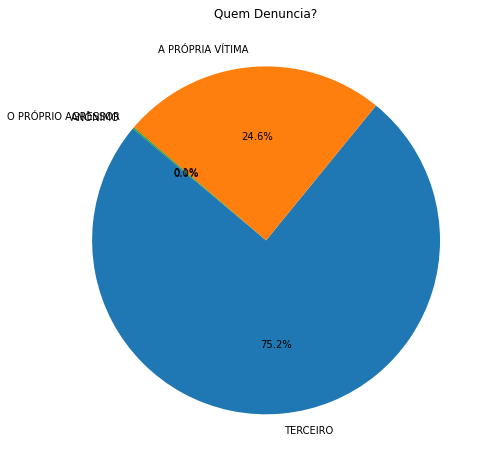

In [209]:
plt.figure(figsize=(8, 8))
plt.pie(p1_2022_df['Denunciante'].value_counts(), labels=['TERCEIRO','A PRÓPRIA VÍTIMA','O PRÓPRIO AGRESSOR','ANÔNIMO'], autopct='%1.1f%%', startangle=140)
plt.title('Quem Denuncia?')
plt.show()

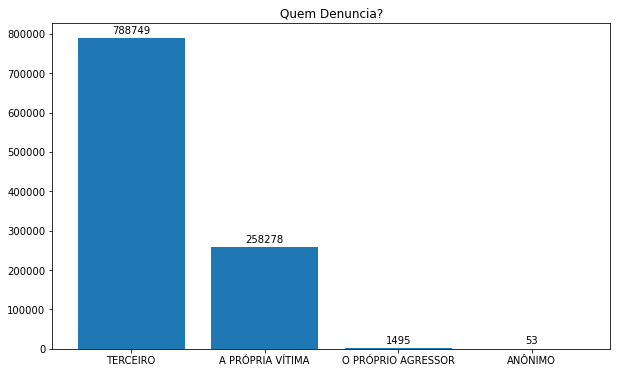

In [210]:
plt.figure(figsize=(10, 6))
barras = plt.bar(['TERCEIRO','A PRÓPRIA VÍTIMA','O PRÓPRIO AGRESSOR','ANÔNIMO'], p1_2022_df['Denunciante'].value_counts())
for barra in barras:
    altura = barra.get_height()
    plt.annotate(f'{altura}',
                 xy=(barra.get_x() + barra.get_width() / 2, altura),
                 xytext=(0, 3),
                 textcoords='offset points',
                 ha='center', va='bottom')
plt.title('Quem Denuncia?')
plt.show()

- Coluna Canal de Atendimento

In [19]:
p1_2022_df.head(2)

,hash,Canal_de_atendimento,Denúncia_emergencial,Denunciante,Cenário_da_violação,País,UF,Município,Frequência,Início_das_violações,...,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia,violacao,date,time,month,hour,weekday,ID
0,A01A483FB2103B5AAF42FC37E45D3886E14B3528C46613...,TELEFÔNICO,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,355030 | SÃO PAULO,DIARIAMENTE,HÁ MAIS DE SEIS MESES,...,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA,2022-08-10,11:25:43.003000,Agosto,11-12,Quarta,0
1,709A353AC30598A075D04B296943139E71D5B08CEDDD1C...,TELEFÔNICO,NÃO,A PRÓPRIA VÍTIMA,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,ES,320530 | VITÓRIA,DIARIAMENTE,HÁ MAIS DE UM ANO,...,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>MAUS TRATOS,2022-07-20,12:58:24.817000,Julho,12-13,Quarta,1


In [23]:
# Quantidade de atendimentos por semana 
weekTran = p1_2022_df.groupby('weekday')['Canal_de_atendimento'].count().reset_index()

In [24]:
# Criar uma ordem personalizada dos dias da semana
ordem_dias_semana = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado']

# Aplicar a ordem personalizada usando a função astype('category')
weekTran['weekday'] = weekTran['weekday'].astype(pd.CategoricalDtype(categories=ordem_dias_semana, ordered=True))

# Ordenar o DataFrame pelo dia da semana
df_ordenado = weekTran.sort_values(by='weekday')

# Resetar o índice se desejar
df_ordenado = df_ordenado.reset_index(drop=True)

In [25]:
df_ordenado

,weekday,Canal_de_atendimento
0,Domingo,92420
1,Segunda,183115
2,Terça,174211
3,Quarta,166265
4,Quinta,165245
5,Sexta,159307
6,Sabado,108012


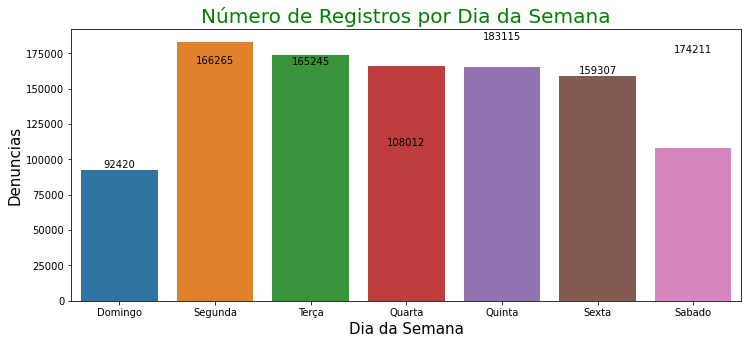

In [28]:
plt.figure(figsize=(12,5))
sns.barplot(data = weekTran, x = "weekday", y = "Canal_de_atendimento")
for index, value in enumerate(weekTran['Canal_de_atendimento']):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.xlabel('Dia da Semana', size = 15)
plt.ylabel('Denuncias', size = 15)
plt.title('Número de Registros por Dia da Semana', color = 'green', size = 20)
plt.show()

plt.show()

In [63]:
# Quantidade de registros por estado
aux = p1_2022_df.groupby('UF')['Canal_de_atendimento'].count().reset_index()
aux

,UF,Canal_de_atendimento
0,AC,2405
1,AL,13328
2,AM,19722
3,AP,1916
4,ATENDIMENTO INTERROMPIDO,562
5,BA,54297
6,CE,34757
7,DENUNCIANTE NÃO SOUBE INFORMAR,10268
8,DF,22665
9,ES,19609


In [64]:
# Removendo as linhas irrelevantes 
aux = aux.drop(4)
aux = aux.drop(7)
aux

,UF,Canal_de_atendimento
0,AC,2405
1,AL,13328
2,AM,19722
3,AP,1916
5,BA,54297
6,CE,34757
8,DF,22665
9,ES,19609
10,GO,29988
11,MA,17519


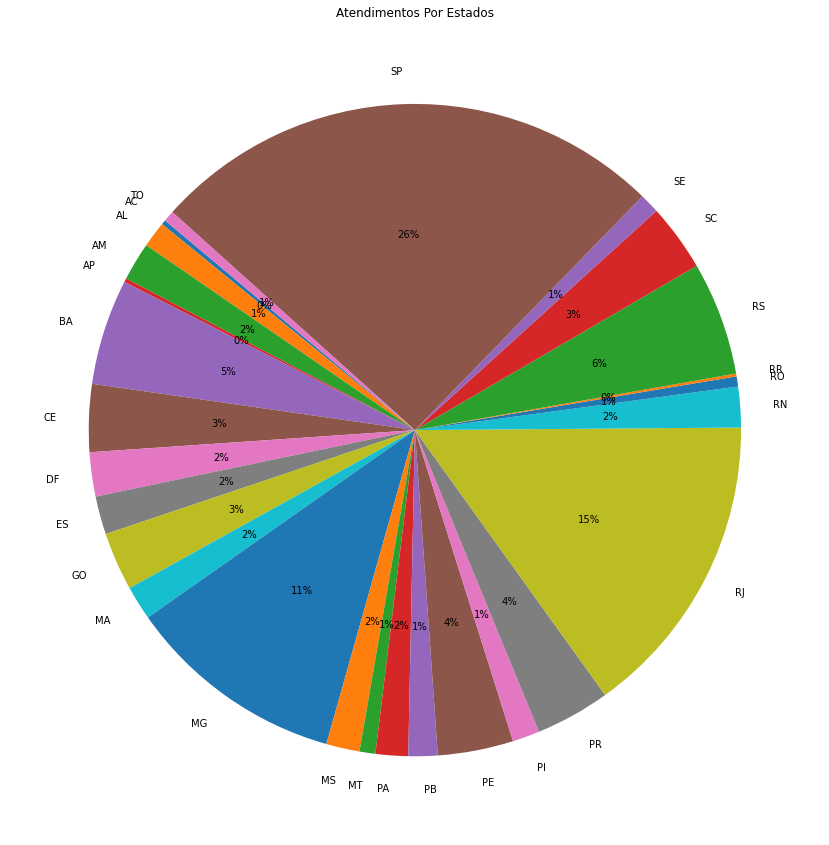

In [104]:
plt.figure(figsize=(15, 15))
plt.pie(aux['Canal_de_atendimento'], labels=aux['UF'], autopct='%1.0f%%', startangle=140)
plt.title('Atendimentos Por Estados')
plt.show()

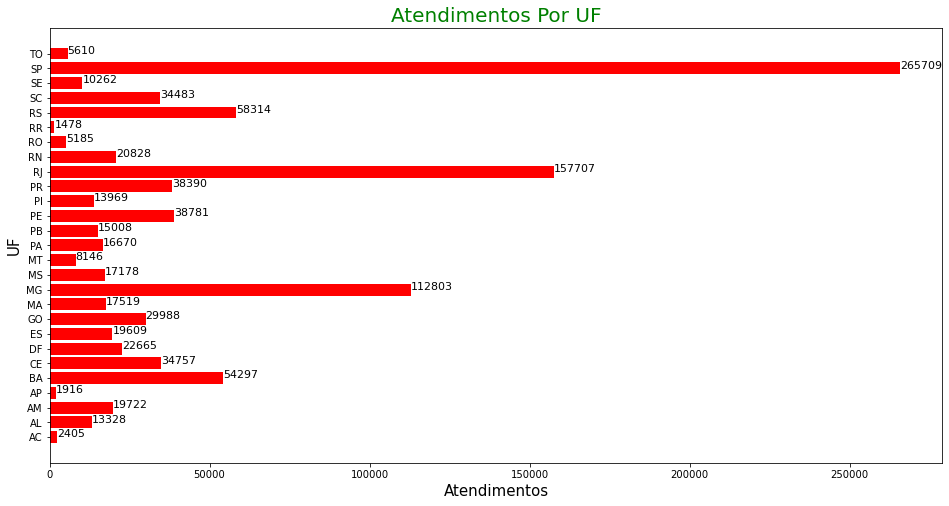

In [98]:
plt.figure(figsize=(16, 8))
plt.barh(aux['UF'], aux['Canal_de_atendimento'], color='red')
for index, value in enumerate(aux['Canal_de_atendimento']):
    plt.text(value, index,str(value), size = 11)
plt.ylabel('UF', size = 15)
plt.xlabel('Atendimentos', size = 15)
plt.title('Atendimentos Por UF', color = 'green', size = 20)
plt.show()

In [110]:
aux.reset_index()

,index,UF,Canal_de_atendimento
0,0,AC,2405
1,1,AL,13328
2,2,AM,19722
3,3,AP,1916
4,5,BA,54297
5,6,CE,34757
6,8,DF,22665
7,9,ES,19609
8,10,GO,29988
9,11,MA,17519


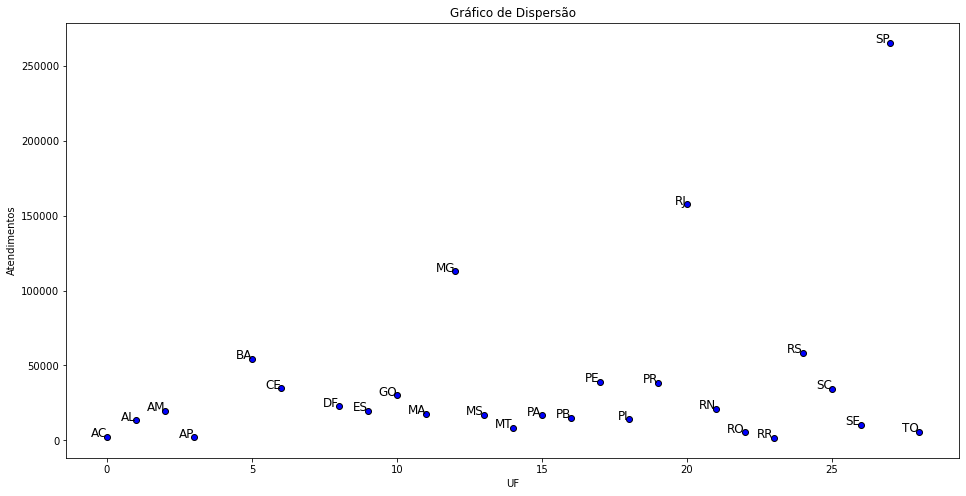

In [129]:
x = aux.index.tolist()
y = aux['Canal_de_atendimento'].tolist()
labels = aux['UF'].tolist()

plt.figure(figsize=(16, 8))
plt.scatter(x, y, color='blue', marker='o', cmap='viridis', edgecolor='black')
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=12, ha='right')
plt.xlabel('UF')
plt.ylabel('Atendimentos')
plt.title('Gráfico de Dispersão')
plt.show()

In [6]:
data = p1_2022_df[['UF', 'Canal_de_atendimento','hour']]
data

,UF,Canal_de_atendimento,hour
0,SP,TELEFÔNICO,11-12
1,ES,TELEFÔNICO,12-13
2,PR,TELEFÔNICO,20-21
3,SP,WHATSAPP,0-1
4,BA,WHATSAPP,13-14
...,...,...,...
1048570,SP,TELEFÔNICO,11-12
1048571,SP,TELEFÔNICO,15-16
1048572,SP,WHATSAPP,7-8
1048573,RJ,TELEFÔNICO,12-13


In [14]:
hour_in_obj = ('0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
period_obj = ('Madrugada','Madrugada','Madrugada','Madrugada','Madrugada','Manhã','Manhã','Manhã','Manhã','Manhã','Manhã','Manhã',
         'Tarde','Tarde','Tarde','Tarde','Tarde','Tarde','Noite','Noite','Noite','Noite','Noite','Noite')
data['period'] = data['hour'].replace(hour_in_obj, period_obj)



C:\Users\User\AppData\Local\Temp/ipykernel_15552/3035433592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['period'] = data['hour'].replace(hour_in_obj, period_obj)


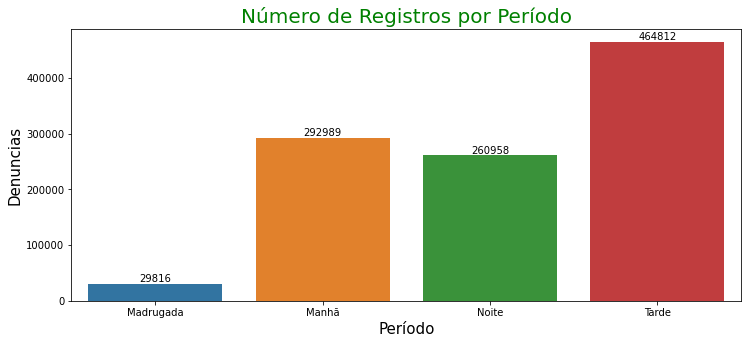

In [9]:
# Quantidade de atendimentos por período do dia (Madrugada, Manhã, Tarde ou Noite)
period = data.groupby('period')['Canal_de_atendimento'].count().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data = period, x = "period", y = "Canal_de_atendimento")
for index, value in enumerate(period['Canal_de_atendimento']):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.xlabel('Período', size = 15)
plt.ylabel('Denuncias', size = 15)
plt.title('Número de Registros por Período', color = 'green', size = 20)
plt.show()


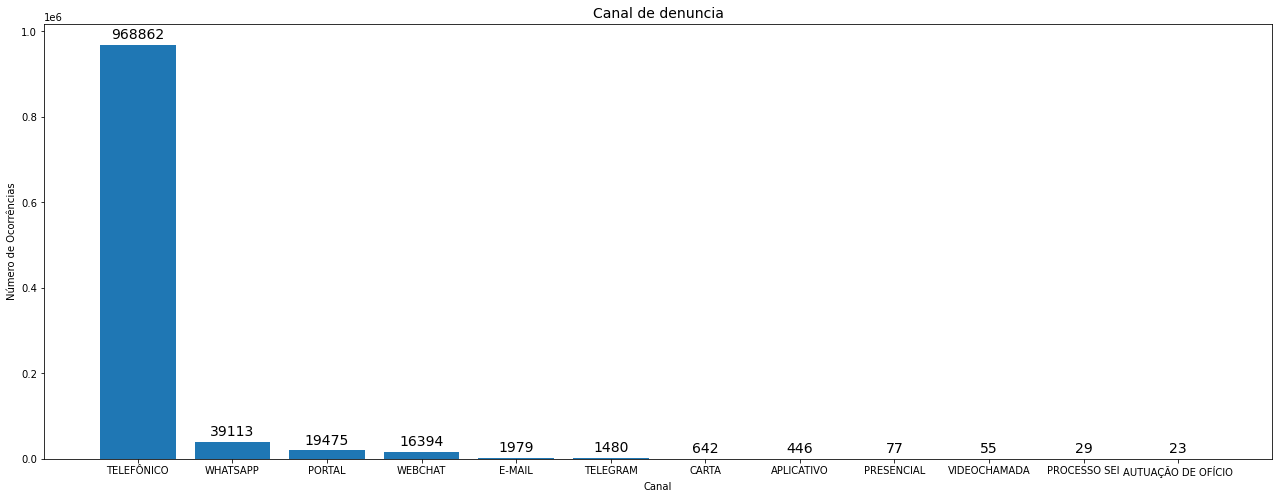

In [30]:
plt.figure(figsize=(22, 8))
barras = plt.bar(data['Canal_de_atendimento'].value_counts().index, data['Canal_de_atendimento'].value_counts())
for barra in barras:
    altura = barra.get_height()
    plt.annotate(f'{altura}',
                 xy=(barra.get_x() + barra.get_width() / 2, altura),
                 xytext=(0, 3),
                 textcoords='offset points',
                 ha='center', va='bottom', size = 14)
plt.xlabel('Canal')
plt.ylabel('Número de Ocorrências')
plt.title('Canal de denuncia', size = 14)
plt.show()

<h1>Observações - <h3>Coluna Canal de Atendimento</h3></h1>
    <p>Os dados mostraram que o segundo semestre de 2022 ocorreram 1048575 denuncias;</p>
    <p>Desse total de ocorrências 52% foram nos estados do sudeste (SP, RJ, MG);</p>
    <p>O dia da semana que possue mais denuncias é a segunda-feira;</p>
    <p>O principal canal usado foi telefone seguido do app Whatsapp</p>
    

- Denúncia emergencial

In [33]:
aux2 = p1_2022_df[['UF', 'Denúncia_emergencial', 'hour']]
hour_in_obj = ('0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
period_obj = ('Madrugada','Madrugada','Madrugada','Madrugada','Madrugada','Manhã','Manhã','Manhã','Manhã','Manhã','Manhã','Manhã',
         'Tarde','Tarde','Tarde','Tarde','Tarde','Tarde','Noite','Noite','Noite','Noite','Noite','Noite')
aux2['period'] = aux2['hour'].replace(hour_in_obj, period_obj)
aux2

C:\Users\User\AppData\Local\Temp/ipykernel_11428/4211368641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux2['period'] = aux2['hour'].replace(hour_in_obj, period_obj)


,UF,Denúncia_emergencial,hour,period
0,SP,NÃO,11-12,Manhã
1,ES,NÃO,12-13,Tarde
2,PR,NÃO,20-21,Noite
3,SP,NÃO,0-1,Madrugada
4,BA,NÃO,13-14,Tarde
...,...,...,...,...
1048570,SP,NÃO,11-12,Manhã
1048571,SP,RISCO IMINENTE DE MORTE DA VÍTIMA,15-16,Tarde
1048572,SP,NÃO,7-8,Manhã
1048573,RJ,NÃO,12-13,Tarde


In [35]:
aux2.dropna(inplace = True)

C:\Users\User\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [65]:
aux2['Denúncia_emergencial'].value_counts()

NÃO                                                            1011795
RISCO IMINENTE DE MORTE DA VÍTIMA                                27210
SITUAÇÃO FLAGRANTE - ATÉ 24H DA OCORRÊNCIA - SEM FREQUÊNCIA       7760
VÍTIMA EM SANGRAMENTO                                              757
Name: Denúncia_emergencial, dtype: int64

In [66]:
t = aux2[aux2['Denúncia_emergencial'] == "RISCO IMINENTE DE MORTE DA VÍTIMA"]

In [76]:
t = t[t['UF'] != 'DENUNCIANTE NÃO SOUBE INFORMAR']

In [80]:
t.head()

,UF,Denúncia_emergencial,hour,period
7,PR,RISCO IMINENTE DE MORTE DA VÍTIMA,12-13,Tarde
54,GO,RISCO IMINENTE DE MORTE DA VÍTIMA,9-10,Manhã
67,SP,RISCO IMINENTE DE MORTE DA VÍTIMA,6-7,Manhã
94,SP,RISCO IMINENTE DE MORTE DA VÍTIMA,16-17,Tarde
127,GO,RISCO IMINENTE DE MORTE DA VÍTIMA,13-14,Tarde


In [83]:
h = t.groupby('UF')['Denúncia_emergencial'].count().reset_index()
h = h.drop(4)
h

,UF,Denúncia_emergencial
0,AC,28
1,AL,285
2,AM,616
3,AP,36
5,BA,1525
6,CE,896
7,DF,406
8,ES,388
9,GO,844
10,MA,476


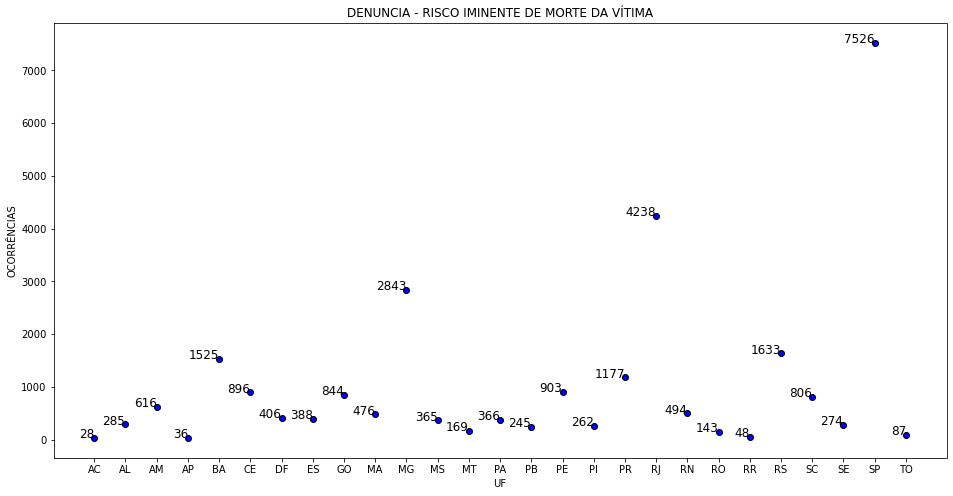

In [86]:
x = h['UF'].tolist()
y = h['Denúncia_emergencial'].tolist()
labels = h['Denúncia_emergencial'].tolist()

plt.figure(figsize=(16, 8))
plt.scatter(x, y, color='blue', marker='o', cmap='viridis', edgecolor='black')
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=12, ha='right')
plt.xlabel('UF')
plt.ylabel('OCORRÊNCIAS')
plt.title('DENUNCIA - RISCO IMINENTE DE MORTE DA VÍTIMA')
plt.show()

In [91]:
t = aux2[aux2['Denúncia_emergencial'] == "SITUAÇÃO FLAGRANTE - ATÉ 24H DA OCORRÊNCIA - SEM FREQUÊNCIA"]
t = t[t['UF'] != 'DENUNCIANTE NÃO SOUBE INFORMAR']
h = t.groupby('UF')['Denúncia_emergencial'].count().reset_index()
h = h.drop(4)


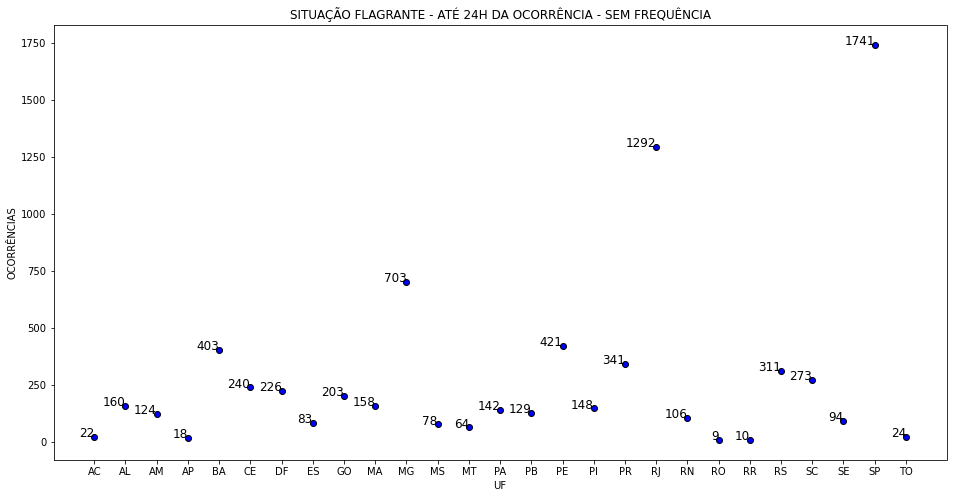

In [94]:
x = h['UF'].tolist()
y = h['Denúncia_emergencial'].tolist()
labels = h['Denúncia_emergencial'].tolist()

plt.figure(figsize=(16, 8))
plt.scatter(x, y, color='blue', marker='o', cmap='viridis', edgecolor='black')
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=12, ha='right')
plt.xlabel('UF')
plt.ylabel('OCORRÊNCIAS')
plt.title("SITUAÇÃO FLAGRANTE - ATÉ 24H DA OCORRÊNCIA - SEM FREQUÊNCIA")
plt.show()

In [101]:
h['Denúncia_emergencial'].value_counts().index

Int64Index([  22,  129, 1741,   94,  273,  311,   10,    9,  106, 1292,  341,
             148,  421,  142,  160,   64,   78,  703,  158,  203,   83,  226,
             240,  403,   18,  124,   24],
           dtype='int64')

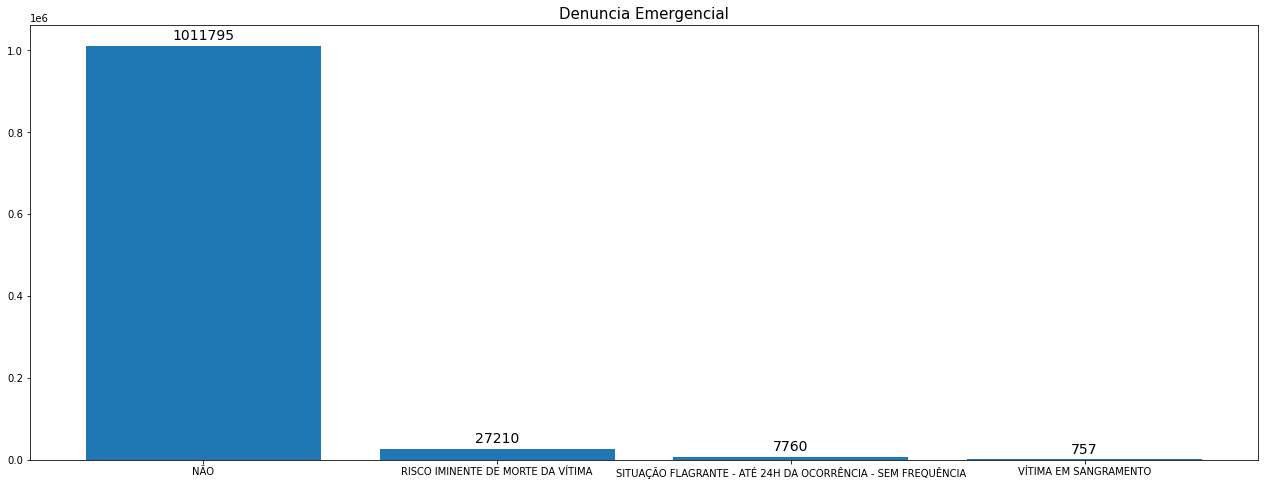

In [104]:
plt.figure(figsize=(22, 8))
barras = plt.bar(aux2['Denúncia_emergencial'].value_counts().index, aux2['Denúncia_emergencial'].value_counts())
for barra in barras:
    altura = barra.get_height()
    plt.annotate(f'{altura}',
                 xy=(barra.get_x() + barra.get_width() / 2, altura),
                 xytext=(0, 3),
                 textcoords='offset points',
                 ha='center', va='bottom', size = 14)
plt.title('Denuncia Emergencial', size = 15)
plt.show()

In [112]:
aux2.describe()

,UF,Denúncia_emergencial,hour,period
count,1047522,1047522,1047522,1047522
unique,29,4,24,4
top,SP,NÃO,11-12,Tarde
freq,265709,1011795,84166,464247


<h1>Observações - <h3>Coluna Denúncia_emergencial</h3></h1>
    <p>Os estados do sudeste (SP, RJ, MG) continuam sendo os com maiores registros;</p>
    <p>São Paulo aparece no topo quando a violência corre risco de morte</p>
    <p>A maioria das ocorrências não foram emergecial</p>

- Cenário da Violencia

In [6]:
df = p1_2022_df[['UF','Canal_de_atendimento','Cenário_da_violação', 'Município','Frequência','Início_das_violações','Grupo_vulnerável','Relação_vítima_suspeito','Sexo_da_vítima','Faixa_etária_da_vítima','Deficiência_da_vítima','Sexo_do_suspeito','Faixa_etária_do_suspeito',
                'Profissão_da_vítima',
'Grau_de_instrução_da_vítima',
'Faixa_de_renda_da_vítima',
'Faixa_de_renda_do_suspeito','violacao']]

In [112]:
df['Faixa_etária_da_vítima'].value_counts()

70 A 74 ANOS                               60725
80 A 84 ANOS                               55040
60 A 64 ANOS                               52002
75 A 79 ANOS                               51071
65 A 69 ANOS                               49654
40 A 44 ANOS                               47833
30 A 34 ANOS                               39529
35 A 39 ANOS                               39363
25 A 29 ANOS                               36181
45 A 49 ANOS                               34973
85 A 89 ANOS                               33044
20 A 24 ANOS                               32292
50 A 54 ANOS                               31136
55 A 59 ANOS                               27598
CRIANÇA/ADOLESCENTE IDADE NÃO INFORMADA    25355
90+                                        25308
12 ANOS                                    25069
10 ANOS                                    24524
07 ANOS                                    24119
05 ANOS                                    23989
NÃO INFORMADO       

In [163]:
# Mostrando apenas os dados únicos de uma coluna
df['Município'].unique().tolist()

['355030 | SÃO PAULO',
 '320530 | VITÓRIA',
 '410690 | CURITIBA',
 '350950 | CAMPINAS',
 '291840 | JUAZEIRO',
 '130260 | MANAUS',
 '280060 | BARRA DOS COQUEIROS',
 '412770 | TOLEDO',
 '313620 | JOÃO MONLEVADE',
 '280030 | ARACAJU',
 '250750 | JOÃO PESSOA',
 '530010 | BRASÍLIA',
 '291080 | FEIRA DE SANTANA',
 '411520 | MARINGÁ',
 '350740 | BORBOREMA',
 '330455 | RIO DE JANEIRO',
 '330100 | CAMPOS DOS GOYTACAZES',
 '352500 | JANDIRA',
 '431490 | PORTO ALEGRE',
 '292720 | RUY BARBOSA',
 '430610 | CRUZ ALTA',
 '431180 | MARAU',
 '250180 | BAYEUX',
 '520140 | APARECIDA DE GOIÂNIA',
 '316292 | SÃO JOAQUIM DE BICAS',
 '350600 | BAURU',
 '314330 | MONTES CLAROS',
 '354870 | SÃO BERNARDO DO CAMPO',
 '250403 | CAPIM',
 '352590 | JUNDIAÍ',
 '270770 | RIO LARGO',
 '412070 | QUATIGUÁ',
 '313820 | LAVRAS',
 'DENUNCIANTE NÃO SOUBE INFORMAR',
 '330420 | RESENDE',
 '292740 | SALVADOR',
 '220177 | BOA HORA',
 '431440 | PELOTAS',
 '310910 | BUENO BRANDÃO',
 '431330 | NOVA PRATA',
 '352410 | ITUVERAVA',
 

In [164]:
# Pegando apenas o nome das cidades para o melhor entendimento
df['Município'] = df['Município'].str.split('|').str[-1].str.strip()
df.head()

C:\Users\User\AppData\Local\Temp/ipykernel_13112/4023574071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Município'] = df['Município'].str.split('|').str[-1].str.strip()


,UF,Canal_de_atendimento,Cenário_da_violação,Município,Frequência,Início_das_violações,Grupo_vulnerável,Relação_vítima_suspeito,Sexo_da_vítima,Faixa_etária_da_vítima,Deficiência_da_vítima,Sexo_do_suspeito,Faixa_etária_do_suspeito,Profissão_da_vítima,Grau_de_instrução_da_vítima,Faixa_de_renda_da_vítima,Faixa_de_renda_do_suspeito
0,SP,TELEFÔNICO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,SÃO PAULO,DIARIAMENTE,HÁ MAIS DE SEIS MESES,VIOLÊNCIA CONTRA PESSOA IDOSA,ESPOSA(O),MASCULINO,80 A 84 ANOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ES,TELEFÔNICO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,VITÓRIA,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA A MULHER,FILHO(A),FEMININO,55 A 59 ANOS,NaN,NÃO INFORMADO,25 A 29 ANOS,NaN,ENSINO MÉDIO INCOMPLETO,MAIS DE 5 A 10 SALÁRIOS MÍNIMOS,NaN
2,PR,TELEFÔNICO,CASA DA VÍTIMA,CURITIBA,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA PESSOA COM DEFICIÊNCIA,MÃE,MASCULINO,02 ANOS,MENTAL/INTELECTUAL,FEMININO,NaN,NaN,NaN,NaN,NaN
3,SP,WHATSAPP,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,CAMPINAS,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA PESSOA IDOSA,ESPOSA(O),FEMININO,85 A 89 ANOS,NaN,MASCULINO,80 A 84 ANOS,NÃO SABE INFORMAR,NaN,NaN,NaN
4,BA,WHATSAPP,CASA DO SUSPEITO,JUAZEIRO,NÃO SABE INFORMAR,HÁ MAIS DE DEZ ANOS,VIOLÊNCIA CONTRA A MULHER,PAI,FEMININO,40 A 44 ANOS,NaN,MASCULINO,75 A 79 ANOS,NaN,SUPERIOR INCOMPLETO,NaN,NaN


In [165]:
#Faixa etária da vítima
age = df['Faixa_etária_da_vítima'].unique().tolist()

In [166]:
faixa_etaria = ('Idoso','Adulto','Bebê','Idoso','Adulto','Criança','Adolescente','Idoso','Adolescente','','Adolescente','Adulto','Adulto',
               'Criança','Criança','Criança','Idoso','Adulto','Adulto','Recem-Nascido','Adulto','Criança','Adolescente','Idoso',
               'Bebê','Adolescente','Criança','Criança/Adolescente','Criança','Idoso','Criança','Recem-Nascido','Adulto','Adulto',
               'Idoso','Idoso','Adolescente','Recem-Nascido','Recem-Nascido','','Adolescente','Bebê','Criança','Criança')
df['Faixa_Etaria_Vitima'] = df['Faixa_etária_da_vítima'].replace(age,faixa_etaria)

C:\Users\User\AppData\Local\Temp/ipykernel_13112/3519714229.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Faixa_Etaria_Vitima'] = df['Faixa_etária_da_vítima'].replace(age,faixa_etaria)


In [167]:
age_susp = df['Faixa_etária_do_suspeito'].unique().tolist()
age_susp

[nan,
 '25 A 29 ANOS',
 '80 A 84 ANOS',
 '75 A 79 ANOS',
 '35 A 39 ANOS',
 '30 A 34 ANOS',
 'NÃO INFORMADO',
 '20 A 24 ANOS',
 '50 A 54 ANOS',
 '45 A 49 ANOS',
 '40 A 44 ANOS',
 '70 A 74 ANOS',
 '60 A 64 ANOS',
 '55 A 59 ANOS',
 '13 ANOS',
 '15 ANOS',
 '65 A 69 ANOS',
 '18 A 19 ANOS',
 '12 ANOS',
 '17 ANOS',
 'CRIANÇA/ADOLESCENTE IDADE NÃO INFORMADA',
 '16 ANOS',
 '14 ANOS',
 'IDOSO IDADE NÃO INFORMADA',
 '90+',
 '85 A 89 ANOS']

In [90]:
len(age_susp)

26

In [168]:
# Faixa etária dos suspeitos
faixa_etaria = ('','Adulto','Idoso','Idoso','Adulto','Adulto','','Adulto','Adulto','Adulto','Adulto','Idoso','Idoso','Adulto',
               'Adolescente','Adolescente','Idoso','Adulto','Adolescente','Adolescente','CRIANÇA/ADOLESCENTE','Adolescente',
                'Adolescente','Idoso','Idoso','Idoso')
df['Faixa_Etaria_Supeito'] = df['Faixa_etária_do_suspeito'].replace(age_susp,faixa_etaria)

C:\Users\User\AppData\Local\Temp/ipykernel_13112/473483605.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Faixa_Etaria_Supeito'] = df['Faixa_etária_do_suspeito'].replace(age_susp,faixa_etaria)


In [97]:
df.head()

,UF,Canal_de_atendimento,Cenário_da_violação,Município,Frequência,Início_das_violações,Grupo_vulnerável,Relação_vítima_suspeito,Sexo_da_vítima,Faixa_etária_da_vítima,Deficiência_da_vítima,Sexo_do_suspeito,Faixa_etária_do_suspeito,Faixa_Etaria_Supeito,Faixa_Etaria_Vitima
0,SP,TELEFÔNICO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,SÃO PAULO,DIARIAMENTE,HÁ MAIS DE SEIS MESES,VIOLÊNCIA CONTRA PESSOA IDOSA,ESPOSA(O),MASCULINO,80 A 84 ANOS,NaN,NaN,NaN,,Idoso
1,ES,TELEFÔNICO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,VITÓRIA,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA A MULHER,FILHO(A),FEMININO,55 A 59 ANOS,NaN,NÃO INFORMADO,25 A 29 ANOS,Adulto,Adulto
2,PR,TELEFÔNICO,CASA DA VÍTIMA,CURITIBA,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA PESSOA COM DEFICIÊNCIA,MÃE,MASCULINO,02 ANOS,MENTAL/INTELECTUAL,FEMININO,NaN,,Bebê
3,SP,WHATSAPP,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,CAMPINAS,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA PESSOA IDOSA,ESPOSA(O),FEMININO,85 A 89 ANOS,NaN,MASCULINO,80 A 84 ANOS,Idoso,Idoso
4,BA,WHATSAPP,CASA DO SUSPEITO,JUAZEIRO,NÃO SABE INFORMAR,HÁ MAIS DE DEZ ANOS,VIOLÊNCIA CONTRA A MULHER,PAI,FEMININO,40 A 44 ANOS,NaN,MASCULINO,75 A 79 ANOS,Idoso,Adulto


In [35]:
df['Relação_vítima_suspeito'].value_counts()

MÃE                                                                 214721
FILHO(A)                                                            209023
PAI                                                                  74817
OUTROS                                                               57468
COMPANHEIRO(A)                                                       57449
IRMÃO(Ã)                                                             40652
VIZINHO(A)                                                           40077
ESPOSA(O)                                                            38851
EX-COMPANHEIRO(A)                                                    34182
PADRASTO/MADRASTA                                                    26340
DESCONHECIDO(A)                                                      22709
OUTROS FAMILIARES                                                    21593
NETO(A)                                                              16536
PRESTADOR(A) DE SERVIÇO  

In [45]:
print('Dados faltantes: ',sum(df['Frequência'].isna()))
print(df['Frequência'].value_counts())

Dados faltantes:  5159
DIARIAMENTE          726159
OCASIONALMENTE        89547
SEMANALMENTE          88853
NÃO SABE INFORMAR     64571
ÚNICA OCORRÊNCIA      60218
MENSALMENTE           14068
Name: Frequência, dtype: int64


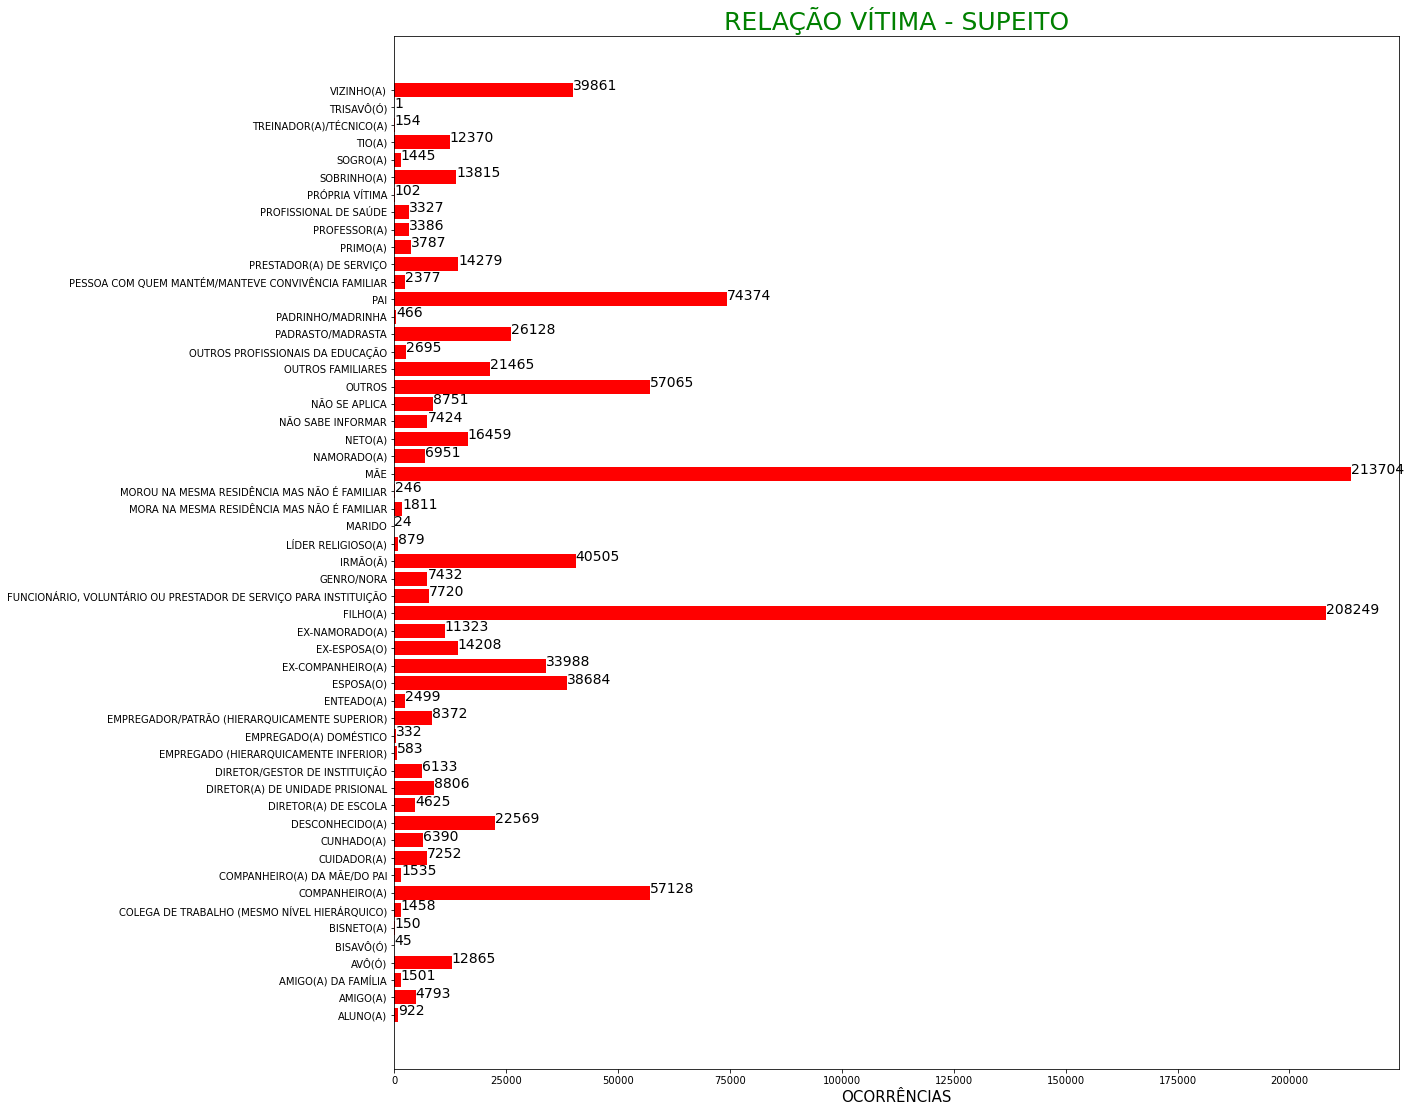

In [54]:
k = df.groupby('Relação_vítima_suspeito')['Frequência'].count().reset_index()
plt.figure(figsize=(18, 19))
plt.barh(k['Relação_vítima_suspeito'], k['Frequência'], color='red')
for index, value in enumerate(k['Frequência']):
    plt.text(value, index,str(value), size = 14)
#plt.ylabel('RELAÇÃO VÍTIMA - SUPEITO', size = 15)
plt.xlabel('OCORRÊNCIAS', size = 15)
plt.title('RELAÇÃO VÍTIMA - SUPEITO', color = 'green', size = 25)
plt.show()

In [57]:
f = df.groupby(['Relação_vítima_suspeito','Frequência'])['Canal_de_atendimento'].count().reset_index()


,Relação_vítima_suspeito,Frequência,Canal_de_atendimento
0,ALUNO(A),DIARIAMENTE,555
1,ALUNO(A),MENSALMENTE,20
2,ALUNO(A),NÃO SABE INFORMAR,23
3,ALUNO(A),OCASIONALMENTE,117
4,ALUNO(A),SEMANALMENTE,58
...,...,...,...
296,VIZINHO(A),MENSALMENTE,434
297,VIZINHO(A),NÃO SABE INFORMAR,1341
298,VIZINHO(A),OCASIONALMENTE,5251
299,VIZINHO(A),SEMANALMENTE,3476


In [68]:
# Como são muito dados preferi usar a frequência = Diariamente. Porém, se for necessário alguma outra informção basta mudar o
# Filtro abaixo
z = f[f['Frequência'] == 'DIARIAMENTE']
z

,Relação_vítima_suspeito,Frequência,Canal_de_atendimento
0,ALUNO(A),DIARIAMENTE,555
6,AMIGO(A),DIARIAMENTE,2432
12,AMIGO(A) DA FAMÍLIA,DIARIAMENTE,766
18,AVÔ(Ó),DIARIAMENTE,9384
24,BISAVÔ(Ó),DIARIAMENTE,45
25,BISNETO(A),DIARIAMENTE,137
28,COLEGA DE TRABALHO (MESMO NÍVEL HIERÁRQUICO),DIARIAMENTE,588
34,COMPANHEIRO(A),DIARIAMENTE,35030
40,COMPANHEIRO(A) DA MÃE/DO PAI,DIARIAMENTE,503
46,CUIDADOR(A),DIARIAMENTE,5264


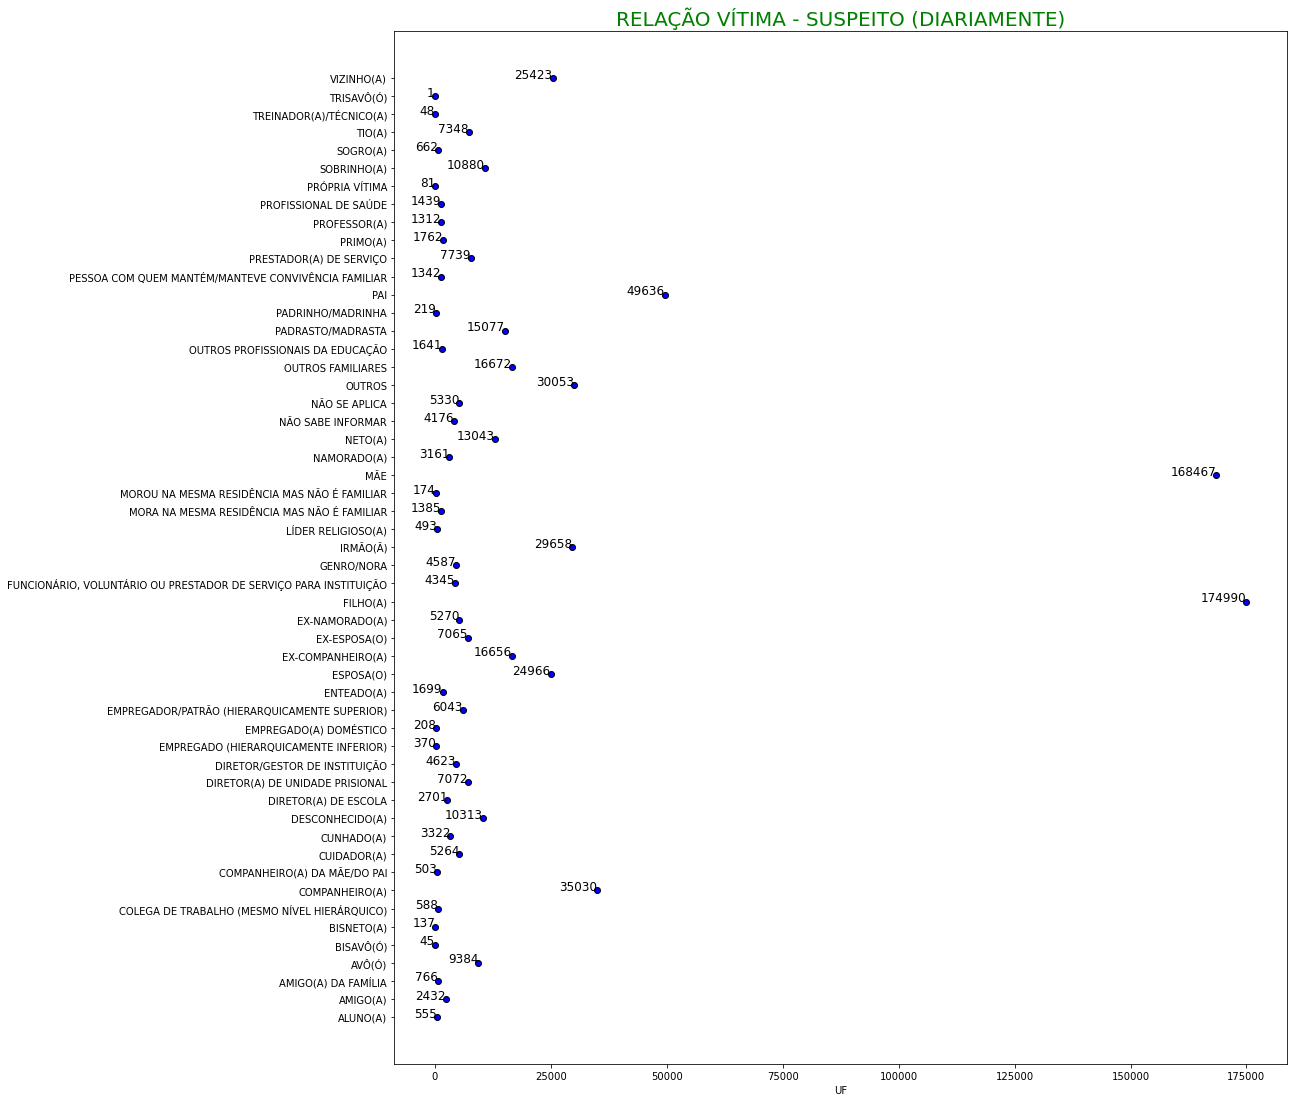

In [67]:
x = z['Canal_de_atendimento'].tolist()
y = z['Relação_vítima_suspeito'].tolist()
labels = z['Canal_de_atendimento'].tolist()

plt.figure(figsize=(16, 19))
plt.scatter(x, y, color='blue', marker='o', cmap='viridis', edgecolor='black')
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=12, ha='right')
plt.xlabel('UF')
#plt.ylabel('OCORRÊNCIAS')
plt.title("RELAÇÃO VÍTIMA - SUSPEITO (DIARIAMENTE)", size = 20, color = 'green')
plt.show()

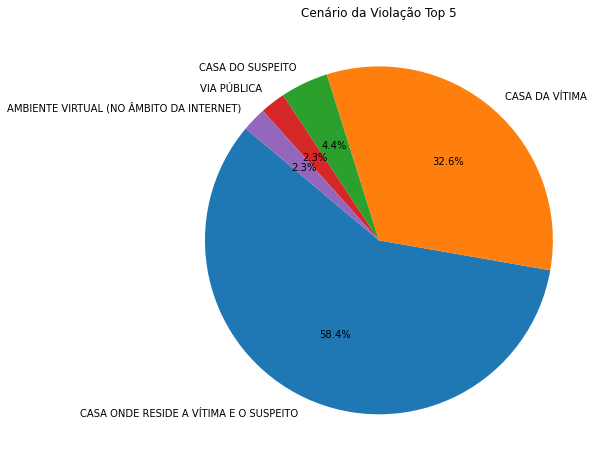

In [128]:
plt.figure(figsize=(8, 8))
plt.pie(df['Cenário_da_violação'].value_counts().head(), labels=df['Cenário_da_violação'].value_counts().head().index, autopct='%1.1f%%', startangle=140)
plt.title('Cenário da Violação Top 5')
plt.show()

In [71]:
print('Dados faltantes: ',sum(df['Sexo_da_vítima'].isna()))
print(df['Sexo_da_vítima'].value_counts())

Dados faltantes:  14
FEMININO                                     686173
MASCULINO                                    312906
NÃO SE APLICA - VÍTIMA COMUNIDADE/FAMÍLIA     29186
NÃO INFORMADO                                 19448
INTERSEXO                                       844
NI                                                4
Name: Sexo_da_vítima, dtype: int64


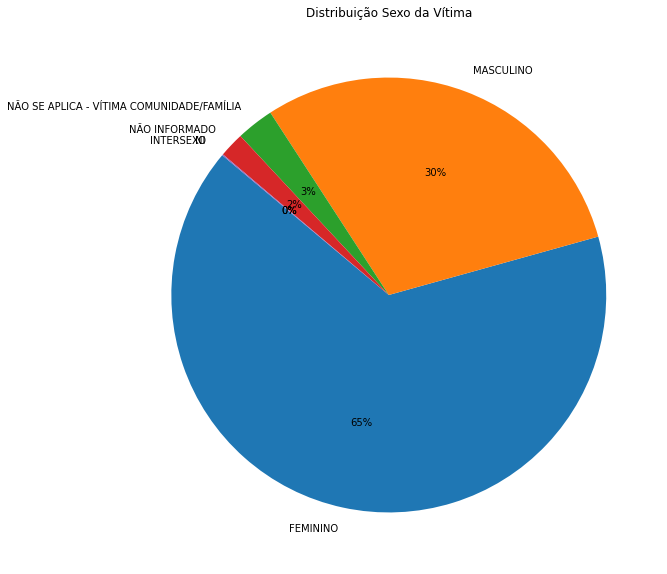

In [75]:
plt.figure(figsize=(10, 10))
plt.pie(df['Sexo_da_vítima'].value_counts(), labels=df['Sexo_da_vítima'].value_counts().index, autopct='%1.0f%%', startangle=140)
plt.title('Distribuição Sexo da Vítima')
plt.show()

In [119]:
print('Dados faltantes: ',sum(df['Sexo_do_suspeito'].isna()))
print(df['Sexo_do_suspeito'].value_counts())

Dados faltantes:  100070
MASCULINO                                    487930
FEMININO                                     413122
NÃO INFORMADO                                 45207
NÃO SE APLICA - VÍTIMA COMUNIDADE/FAMÍLIA      1907
INTERSEXO                                       334
INTERSEXO                                         5
Name: Sexo_do_suspeito, dtype: int64


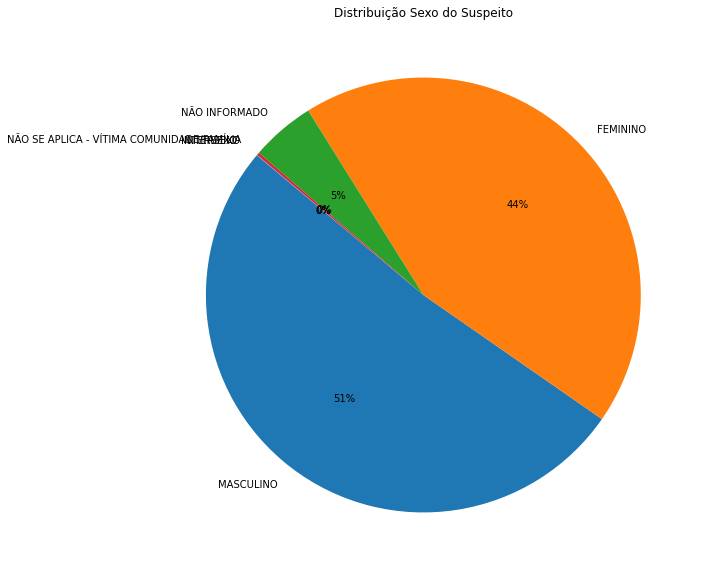

In [120]:
plt.figure(figsize=(10, 10))
plt.pie(df['Sexo_do_suspeito'].value_counts(), labels=df['Sexo_do_suspeito'].value_counts().index, autopct='%1.0f%%', startangle=140)
plt.title('Distribuição Sexo do Suspeito')
plt.show()

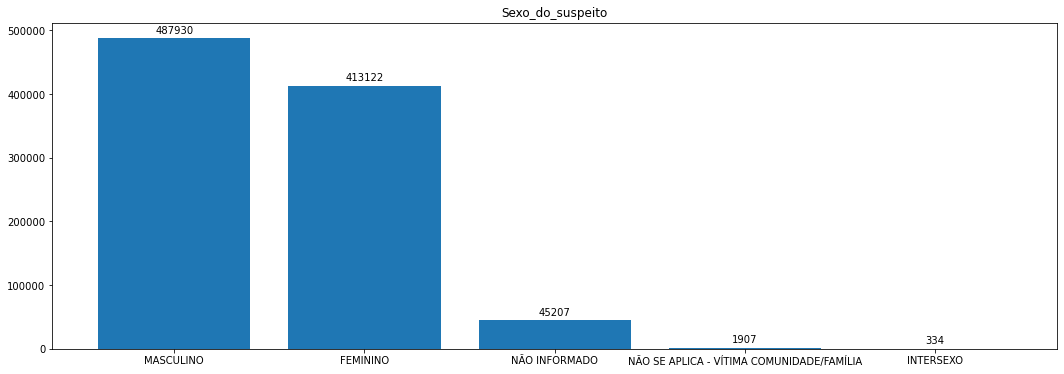

In [242]:
plt.figure(figsize=(18, 6))
barras = plt.bar(['MASCULINO','FEMININO','NÃO INFORMADO','NÃO SE APLICA - VÍTIMA COMUNIDADE/FAMÍLIA','INTERSEXO'], p1_2022_df['Sexo_do_suspeito'].value_counts().head())
for barra in barras:
    altura = barra.get_height()
    plt.annotate(f'{altura}',
                 xy=(barra.get_x() + barra.get_width() / 2, altura),
                 xytext=(0, 3),
                 textcoords='offset points',
                 ha='center', va='bottom')
plt.title('Sexo_do_suspeito')
plt.show()

In [111]:
df.head()

,UF,Canal_de_atendimento,Cenário_da_violação,Município,Frequência,Início_das_violações,Grupo_vulnerável,Relação_vítima_suspeito,Sexo_da_vítima,Faixa_etária_da_vítima,Deficiência_da_vítima,Sexo_do_suspeito,Faixa_etária_do_suspeito,Faixa_Etaria_Supeito,Faixa_Etaria_Vitima
0,SP,TELEFÔNICO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,SÃO PAULO,DIARIAMENTE,HÁ MAIS DE SEIS MESES,VIOLÊNCIA CONTRA PESSOA IDOSA,ESPOSA(O),MASCULINO,80 A 84 ANOS,NaN,NaN,NaN,,Idoso
1,ES,TELEFÔNICO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,VITÓRIA,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA A MULHER,FILHO(A),FEMININO,55 A 59 ANOS,NaN,NÃO INFORMADO,25 A 29 ANOS,Adulto,Adulto
2,PR,TELEFÔNICO,CASA DA VÍTIMA,CURITIBA,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA PESSOA COM DEFICIÊNCIA,MÃE,MASCULINO,02 ANOS,MENTAL/INTELECTUAL,FEMININO,NaN,,Bebê
3,SP,WHATSAPP,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,CAMPINAS,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA PESSOA IDOSA,ESPOSA(O),FEMININO,85 A 89 ANOS,NaN,MASCULINO,80 A 84 ANOS,Idoso,Idoso
4,BA,WHATSAPP,CASA DO SUSPEITO,JUAZEIRO,NÃO SABE INFORMAR,HÁ MAIS DE DEZ ANOS,VIOLÊNCIA CONTRA A MULHER,PAI,FEMININO,40 A 44 ANOS,NaN,MASCULINO,75 A 79 ANOS,Idoso,Adulto


In [107]:
aux = df[df['Faixa_Etaria_Vitima'] != '']

In [108]:
aux['Faixa_Etaria_Vitima'].value_counts()

Idoso                  334158
Adulto                 300995
Criança                183985
Adolescente            114650
Bebê                    40152
Criança/Adolescente     25355
Recem-Nascido           25335
Name: Faixa_Etaria_Vitima, dtype: int64

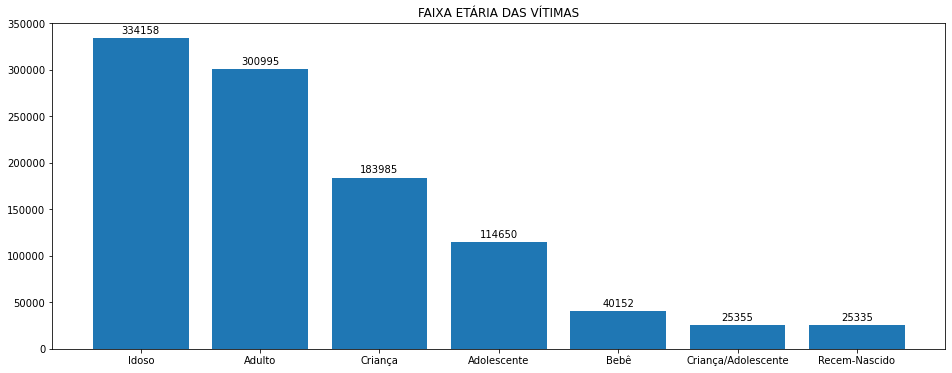

In [110]:
plt.figure(figsize=(16, 6))
barras = plt.bar(aux['Faixa_Etaria_Vitima'].value_counts().index, aux['Faixa_Etaria_Vitima'].value_counts())
for barra in barras:
    altura = barra.get_height()
    plt.annotate(f'{altura}',
                 xy=(barra.get_x() + barra.get_width() / 2, altura),
                 xytext=(0, 3),
                 textcoords='offset points',
                 ha='center', va='bottom')
plt.title('FAIXA ETÁRIA DAS VÍTIMAS')
plt.show()

In [116]:
aux = df[df['Faixa_Etaria_Supeito'] != '']

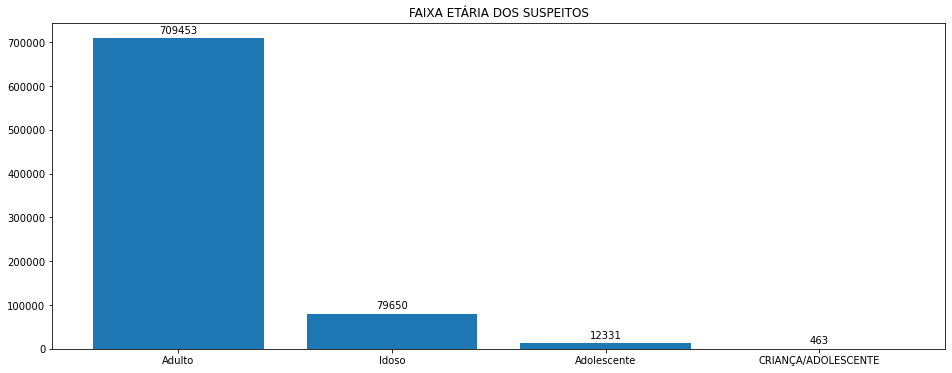

In [118]:
plt.figure(figsize=(16, 6))
barras = plt.bar(aux['Faixa_Etaria_Supeito'].value_counts().index, aux['Faixa_Etaria_Supeito'].value_counts())
for barra in barras:
    altura = barra.get_height()
    plt.annotate(f'{altura}',
                 xy=(barra.get_x() + barra.get_width() / 2, altura),
                 xytext=(0, 3),
                 textcoords='offset points',
                 ha='center', va='bottom')
plt.title('FAIXA ETÁRIA DOS SUSPEITOS')
plt.show()

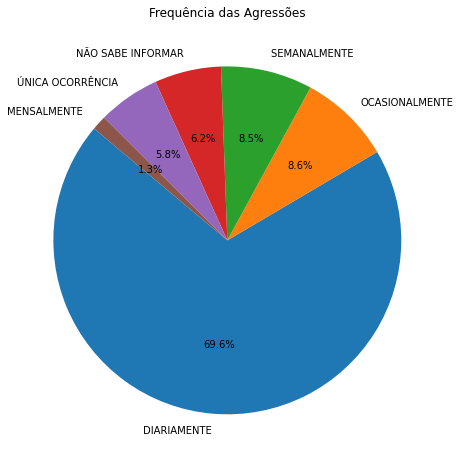

In [240]:
plt.figure(figsize=(8, 8))
plt.pie(p1_2022_df['Frequência'].value_counts(), labels=['DIARIAMENTE','OCASIONALMENTE','SEMANALMENTE ','NÃO SABE INFORMAR','ÚNICA OCORRÊNCIA','MENSALMENTE '], autopct='%1.1f%%', startangle=140)
plt.title('Frequência das Agressões')
plt.show()

In [138]:
violacoes = df[(df['Início_das_violações'] != 'NÃO SABE INFORMAR') & (df['Início_das_violações'] != 'NÃO SE APLICA')]
violacoes

,UF,Canal_de_atendimento,Cenário_da_violação,Município,Frequência,Início_das_violações,Grupo_vulnerável,Relação_vítima_suspeito,Sexo_da_vítima,Faixa_etária_da_vítima,Deficiência_da_vítima,Sexo_do_suspeito,Faixa_etária_do_suspeito,Faixa_Etaria_Supeito,Faixa_Etaria_Vitima
0,SP,TELEFÔNICO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,SÃO PAULO,DIARIAMENTE,HÁ MAIS DE SEIS MESES,VIOLÊNCIA CONTRA PESSOA IDOSA,ESPOSA(O),MASCULINO,80 A 84 ANOS,NaN,NaN,NaN,,Idoso
1,ES,TELEFÔNICO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,VITÓRIA,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA A MULHER,FILHO(A),FEMININO,55 A 59 ANOS,NaN,NÃO INFORMADO,25 A 29 ANOS,Adulto,Adulto
2,PR,TELEFÔNICO,CASA DA VÍTIMA,CURITIBA,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA PESSOA COM DEFICIÊNCIA,MÃE,MASCULINO,02 ANOS,MENTAL/INTELECTUAL,FEMININO,NaN,,Bebê
3,SP,WHATSAPP,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,CAMPINAS,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA PESSOA IDOSA,ESPOSA(O),FEMININO,85 A 89 ANOS,NaN,MASCULINO,80 A 84 ANOS,Idoso,Idoso
4,BA,WHATSAPP,CASA DO SUSPEITO,JUAZEIRO,NÃO SABE INFORMAR,HÁ MAIS DE DEZ ANOS,VIOLÊNCIA CONTRA A MULHER,PAI,FEMININO,40 A 44 ANOS,NaN,MASCULINO,75 A 79 ANOS,Idoso,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,PB,TELEFÔNICO,CASA DA VÍTIMA,INGÁ,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA A MULHER,VIZINHO(A),FEMININO,35 A 39 ANOS,NaN,MASCULINO,50 A 54 ANOS,Adulto,Adulto
1048570,SP,TELEFÔNICO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,SÃO PAULO,DIARIAMENTE,HÁ UM MÊS,VIOLÊNCIA CONTRA PESSOA IDOSA,EX-ESPOSA(O),FEMININO,65 A 69 ANOS,NaN,MASCULINO,70 A 74 ANOS,Idoso,Idoso
1048571,SP,TELEFÔNICO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,RIO CLARO,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA CRIANÇA OU ADOLESCENTE,PADRASTO/MADRASTA,FEMININO,06 ANOS,NaN,MASCULINO,NÃO INFORMADO,,Criança
1048572,SP,WHATSAPP,CASA DA VÍTIMA,GUARULHOS,DIARIAMENTE,HÁ UMA SEMANA,VIOLÊNCIA CONTRA PESSOA COM DEFICIÊNCIA,MÃE,MASCULINO,10 ANOS,NaN,FEMININO,30 A 34 ANOS,Adulto,Criança


In [143]:
l = violacoes.groupby(['Frequência','Início_das_violações'])['Canal_de_atendimento'].count().reset_index()
l

,Frequência,Início_das_violações,Canal_de_atendimento
0,DIARIAMENTE,HÁ MAIS DE CINCO ANOS,77166
1,DIARIAMENTE,HÁ MAIS DE DEZ ANOS,56779
2,DIARIAMENTE,HÁ MAIS DE SEIS MESES,119566
3,DIARIAMENTE,HÁ MAIS DE UM ANO,261382
4,DIARIAMENTE,HÁ UM MÊS,110741
5,DIARIAMENTE,HÁ UMA SEMANA,27296
6,MENSALMENTE,HÁ MAIS DE CINCO ANOS,1694
7,MENSALMENTE,HÁ MAIS DE DEZ ANOS,1448
8,MENSALMENTE,HÁ MAIS DE SEIS MESES,2216
9,MENSALMENTE,HÁ MAIS DE UM ANO,5665


In [147]:
amostra = l[l['Frequência'] == 'DIARIAMENTE']
amostra

,Frequência,Início_das_violações,Canal_de_atendimento
0,DIARIAMENTE,HÁ MAIS DE CINCO ANOS,77166
1,DIARIAMENTE,HÁ MAIS DE DEZ ANOS,56779
2,DIARIAMENTE,HÁ MAIS DE SEIS MESES,119566
3,DIARIAMENTE,HÁ MAIS DE UM ANO,261382
4,DIARIAMENTE,HÁ UM MÊS,110741
5,DIARIAMENTE,HÁ UMA SEMANA,27296


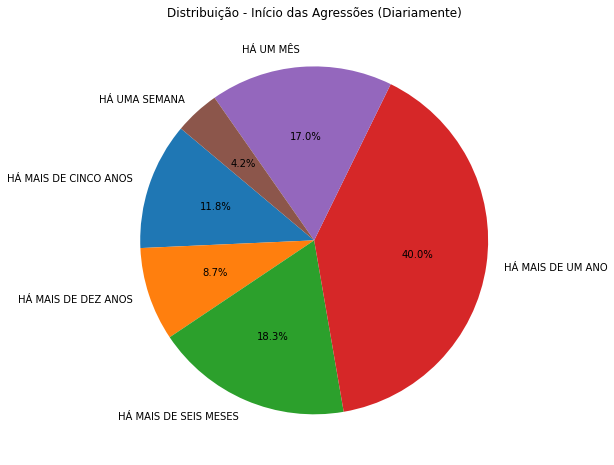

In [159]:
plt.figure(figsize=(8, 8))
plt.pie(amostra['Canal_de_atendimento'], labels=amostra['Início_das_violações'].values, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição - Início das Agressões (Diariamente)')
plt.show()

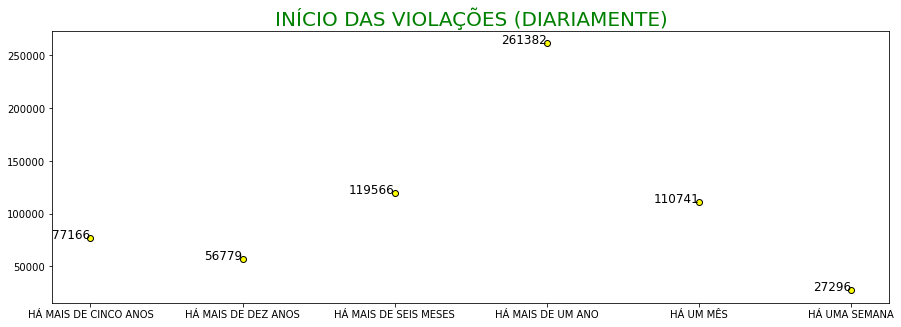

In [153]:
x = amostra['Início_das_violações'].tolist()
y = amostra['Canal_de_atendimento'].tolist()
labels = amostra['Canal_de_atendimento'].tolist()

plt.figure(figsize=(15, 5))
plt.scatter(x, y, color='yellow', marker='o', cmap='viridis', edgecolor='black')
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=12, ha='right')
#plt.xlabel('INÍCIO DAS VIOLAÇÕES')
#plt.ylabel('OCORRÊNCIAS')
plt.title("INÍCIO DAS VIOLAÇÕES (DIARIAMENTE)", size = 20, color = 'green')
plt.show()

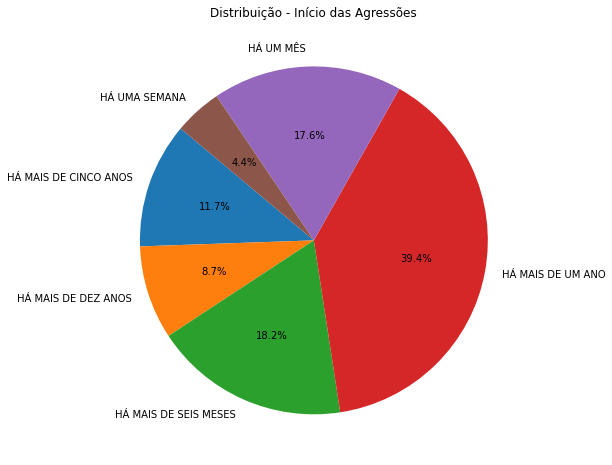

In [156]:
t = violacoes.groupby('Início_das_violações')['Canal_de_atendimento'].count().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(t['Canal_de_atendimento'], labels=t['Início_das_violações'].values, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição - Início das Agressões')
plt.show()

<h1> Observações </h1>
    <p>A maior das vítimas são mulheres</p>
    <p>Com relação aos suspeitos temos quase um empate entre mulheres e homens</p>
    <p>Foram registrados 56k de casos de violações que ocorrem há 10 anos com frequência = Diariamente</p>
    <p>40% das agressões ocorrem há mais de um ano</p>
    <p>O principal lugar onde ocorre a violência é casa onde a vítima mora com o suspeito, em torno de 60%</p>

<h1>Aspectos Econômicos</h1>
<p> Nesta seção abaixo será feito uma análise com relação aos dados que envolvem aspectos econômicos</p>

In [212]:
df.head()

,UF,Canal_de_atendimento,Cenário_da_violação,Município,Frequência,Início_das_violações,Grupo_vulnerável,Relação_vítima_suspeito,Sexo_da_vítima,Faixa_etária_da_vítima,Deficiência_da_vítima,Sexo_do_suspeito,Faixa_etária_do_suspeito,Profissão_da_vítima,Grau_de_instrução_da_vítima,Faixa_de_renda_da_vítima,Faixa_de_renda_do_suspeito
0,SP,TELEFÔNICO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,355030 | SÃO PAULO,DIARIAMENTE,HÁ MAIS DE SEIS MESES,VIOLÊNCIA CONTRA PESSOA IDOSA,ESPOSA(O),MASCULINO,80 A 84 ANOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ES,TELEFÔNICO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,320530 | VITÓRIA,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA A MULHER,FILHO(A),FEMININO,55 A 59 ANOS,NaN,NÃO INFORMADO,25 A 29 ANOS,NaN,ENSINO MÉDIO INCOMPLETO,MAIS DE 5 A 10 SALÁRIOS MÍNIMOS,NaN
2,PR,TELEFÔNICO,CASA DA VÍTIMA,410690 | CURITIBA,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA PESSOA COM DEFICIÊNCIA,MÃE,MASCULINO,02 ANOS,MENTAL/INTELECTUAL,FEMININO,NaN,NaN,NaN,NaN,NaN
3,SP,WHATSAPP,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,350950 | CAMPINAS,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA PESSOA IDOSA,ESPOSA(O),FEMININO,85 A 89 ANOS,NaN,MASCULINO,80 A 84 ANOS,NÃO SABE INFORMAR,NaN,NaN,NaN
4,BA,WHATSAPP,CASA DO SUSPEITO,291840 | JUAZEIRO,NÃO SABE INFORMAR,HÁ MAIS DE DEZ ANOS,VIOLÊNCIA CONTRA A MULHER,PAI,FEMININO,40 A 44 ANOS,NaN,MASCULINO,75 A 79 ANOS,NaN,SUPERIOR INCOMPLETO,NaN,NaN


In [173]:
df['Profissão_da_vítima'].unique().tolist()

[nan,
 'NÃO SABE INFORMAR',
 'ESTUDANTE',
 'OUTROS NÃO LISTADOS',
 'MECÂNICO DE VEÍCULOS AUTOMOTORES',
 'CABELEIREIRO, MANICURE OU OUTRAS ATIVIDADES DO SETOR DE ESTÉTICA',
 'OUTROS TRABALHADORES DO SETOR DE SERVIÇOS',
 'PROFESSOR DO ENSINO FUNDAMENTAL',
 'ENFERMEIRO/TÉCNICO DE ENFERMAGEM/AUXILIAR DE ENFERMAGEM',
 'ASSISTENTE ADMINISTRATIVO/AUXILIAR DE ESCRITÓRIO',
 'COZINHEIRO GERAL',
 'DOULA',
 'ADVOGADO',
 'TRABALHADOR DO SETOR DO COMÉRCIO (AMBULANTE, VAREJISTA, ATACADISTA)',
 'CONSELHEIRO TUTELAR',
 'OUTRO PROFISSIONAL DA ÁREA DE SAÚDE (FISIOTERAPEUTA, PSICÓLOGO, NUTRICIONISTA, DENTISTA, FARMACÊUTICO, BIOMÉDICO, EDUCADOR FÍSICO ETC)',
 'TRABALHADOR DO SETOR PRIMÁRIO (AGRICULTURA, PECUÁRIA, MINERAÇÃO, EXTRATIVISMO)',
 'OUTROS PROFISSIONAIS LIBERAIS',
 'MOTORISTA PROFISSIONAL (ÔNIBUS, TÁXI, CAMINHÃO, MOTOTÁXI, OUTROS)',
 'DOMÉSTICO/FAXINEIRO',
 'OPERADOR DE TELEMARKETING',
 'CUIDADOR/BABÁ',
 'COSTUREIRO OU SERVIÇOS DE CONFECÇÃO EM GERAL',
 'PORTEIRO/VIGILANTE/RECEPCIONISTA',
 'PROFESS

In [174]:
df['Faixa_de_renda_da_vítima'].unique().tolist()


[nan,
 'MAIS DE 5 A 10 SALÁRIOS MÍNIMOS',
 'MAIS DE 1 A 2 SALÁRIOS MÍNIMOS',
 'MAIS DE 2 A 5 SALÁRIOS MÍNIMOS',
 'SEM RENDIMENTO',
 'MAIS DE 1/2 A 1 SALÁRIO MÍNIMO',
 'ATÉ 1/2 SALÁRIO MÍNIMO',
 'MAIS DE 10 A 20 SALÁRIOS MÍNIMOS',
 'MAIS DE 20 SALÁRIOS MÍNIMOS',
 'ATÉ 1 SM']

In [7]:
def verify(dataFrame, coluna):
    print('Dados Faltantes: ',sum(dataFrame[str(coluna)].isna()))
    print('\n',dataFrame[str(coluna)].value_counts())
    print('\nDescrição dos dados:\n',dataFrame[str(coluna)].describe())
    

In [193]:
verify(df,'Faixa_de_renda_da_vítima')

Dados Faltantes:  750608

 MAIS DE 1/2 A 1 SALÁRIO MÍNIMO      79748
MAIS DE 1 A 2 SALÁRIOS MÍNIMOS      70323
ATÉ 1/2 SALÁRIO MÍNIMO              53242
SEM RENDIMENTO                      44646
MAIS DE 2 A 5 SALÁRIOS MÍNIMOS      37275
MAIS DE 5 A 10 SALÁRIOS MÍNIMOS      9119
MAIS DE 10 A 20 SALÁRIOS MÍNIMOS     2572
MAIS DE 20 SALÁRIOS MÍNIMOS          1019
ATÉ 1 SM                               23
Name: Faixa_de_renda_da_vítima, dtype: int64

Descrição dos dados:
 count                             297967
unique                                 9
top       MAIS DE 1/2 A 1 SALÁRIO MÍNIMO
freq                               79748
Name: Faixa_de_renda_da_vítima, dtype: object


In [213]:
verify(df,'Grau_de_instrução_da_vítima')

Dados Faltantes:  648147

 ENSINO FUNDAMENTAL INCOMPLETO    166291
ENSINO MÉDIO COMPLETO             72150
ANALFABETO/SEM INSTRUÇÃO          55516
ENSINO MÉDIO INCOMPLETO           31150
SUPERIOR COMPLETO                 29989
ENSINO FUNDAMENTAL COMPLETO       20391
SUPERIOR INCOMPLETO               18134
PÓS-GRADUAÇÃO                      5291
MESTRADO                            787
DOUTORADO                           480
PÓS-DOUTORADO                       249
Name: Grau_de_instrução_da_vítima, dtype: int64

Descrição dos dados:
 count                            400428
unique                               11
top       ENSINO FUNDAMENTAL INCOMPLETO
freq                             166291
Name: Grau_de_instrução_da_vítima, dtype: object


In [215]:
df.head(3)

,UF,Canal_de_atendimento,Cenário_da_violação,Município,Frequência,Início_das_violações,Grupo_vulnerável,Relação_vítima_suspeito,Sexo_da_vítima,Faixa_etária_da_vítima,Deficiência_da_vítima,Sexo_do_suspeito,Faixa_etária_do_suspeito,Profissão_da_vítima,Grau_de_instrução_da_vítima,Faixa_de_renda_da_vítima,Faixa_de_renda_do_suspeito
0,SP,TELEFÔNICO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,355030 | SÃO PAULO,DIARIAMENTE,HÁ MAIS DE SEIS MESES,VIOLÊNCIA CONTRA PESSOA IDOSA,ESPOSA(O),MASCULINO,80 A 84 ANOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ES,TELEFÔNICO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,320530 | VITÓRIA,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA A MULHER,FILHO(A),FEMININO,55 A 59 ANOS,NaN,NÃO INFORMADO,25 A 29 ANOS,NaN,ENSINO MÉDIO INCOMPLETO,MAIS DE 5 A 10 SALÁRIOS MÍNIMOS,NaN
2,PR,TELEFÔNICO,CASA DA VÍTIMA,410690 | CURITIBA,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA PESSOA COM DEFICIÊNCIA,MÃE,MASCULINO,02 ANOS,MENTAL/INTELECTUAL,FEMININO,NaN,NaN,NaN,NaN,NaN


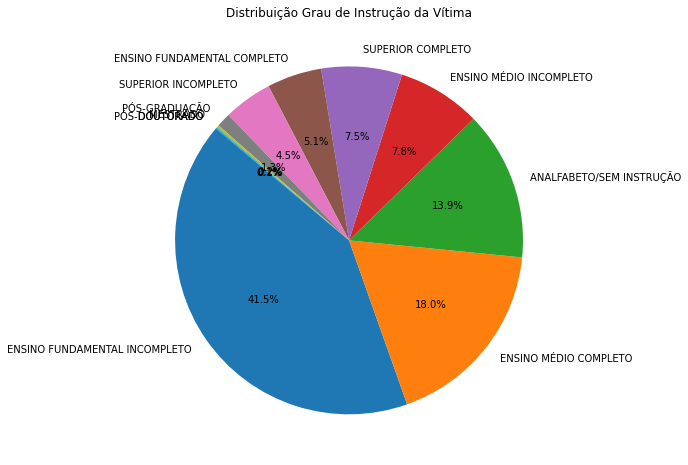

In [218]:
plt.figure(figsize=(8, 8))
plt.pie(df['Grau_de_instrução_da_vítima'].value_counts(), labels=df['Grau_de_instrução_da_vítima'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Grau de Instrução da Vítima')
plt.show()

In [222]:
sample = df[df['Grau_de_instrução_da_vítima'].notna()]
sample.head()

,UF,Canal_de_atendimento,Cenário_da_violação,Município,Frequência,Início_das_violações,Grupo_vulnerável,Relação_vítima_suspeito,Sexo_da_vítima,Faixa_etária_da_vítima,Deficiência_da_vítima,Sexo_do_suspeito,Faixa_etária_do_suspeito,Profissão_da_vítima,Grau_de_instrução_da_vítima,Faixa_de_renda_da_vítima,Faixa_de_renda_do_suspeito
1,ES,TELEFÔNICO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,320530 | VITÓRIA,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA A MULHER,FILHO(A),FEMININO,55 A 59 ANOS,NaN,NÃO INFORMADO,25 A 29 ANOS,NaN,ENSINO MÉDIO INCOMPLETO,MAIS DE 5 A 10 SALÁRIOS MÍNIMOS,NaN
4,BA,WHATSAPP,CASA DO SUSPEITO,291840 | JUAZEIRO,NÃO SABE INFORMAR,HÁ MAIS DE DEZ ANOS,VIOLÊNCIA CONTRA A MULHER,PAI,FEMININO,40 A 44 ANOS,NaN,MASCULINO,75 A 79 ANOS,NaN,SUPERIOR INCOMPLETO,NaN,NaN
7,PR,TELEFÔNICO,CASA DA VÍTIMA,412770 | TOLEDO,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA PESSOA COM DEFICIÊNCIA,FILHO(A),FEMININO,65 A 69 ANOS,NaN,NaN,NaN,NaN,ENSINO FUNDAMENTAL INCOMPLETO,MAIS DE 1 A 2 SALÁRIOS MÍNIMOS,NaN
10,PB,TELEFÔNICO,INSTITUIÇÃO DE ENSINO,250750 | JOÃO PESSOA,DIARIAMENTE,HÁ UM MÊS,VIOLÊNCIA CONTRA PESSOA COM DEFICIÊNCIA,DIRETOR(A) DE ESCOLA,MASCULINO,11 ANOS,NaN,FEMININO,NÃO INFORMADO,ESTUDANTE,ENSINO FUNDAMENTAL INCOMPLETO,NaN,NaN
11,DF,TELEFÔNICO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,530010 | BRASÍLIA,SEMANALMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA CRIANÇA OU ADOLESCENTE,MÃE,MASCULINO,12 ANOS,NÃO,FEMININO,30 A 34 ANOS,ESTUDANTE,ENSINO FUNDAMENTAL INCOMPLETO,NaN,NaN


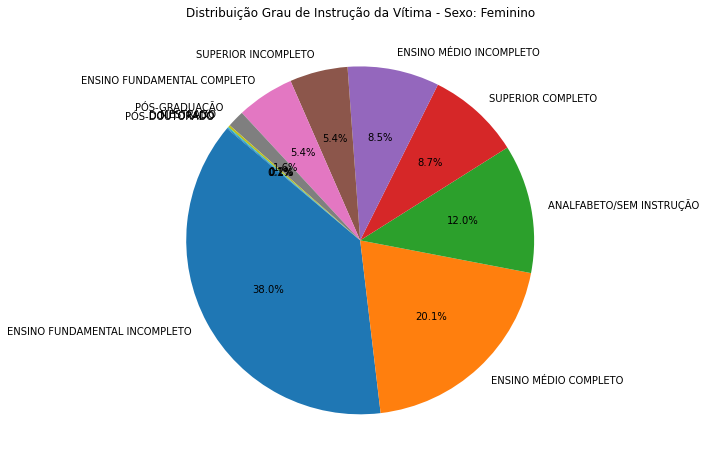

In [227]:
s = sample[sample['Sexo_da_vítima'] == 'FEMININO']
plt.figure(figsize=(8, 8))
plt.pie(s['Grau_de_instrução_da_vítima'].value_counts(), labels=s['Grau_de_instrução_da_vítima'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Grau de Instrução da Vítima - Sexo: Feminino')
plt.show()

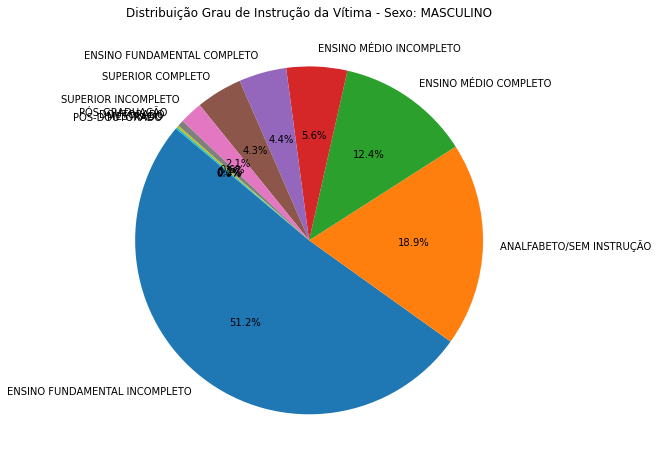

In [228]:
s = sample[sample['Sexo_da_vítima'] == 'MASCULINO']
plt.figure(figsize=(8, 8))
plt.pie(s['Grau_de_instrução_da_vítima'].value_counts(), labels=s['Grau_de_instrução_da_vítima'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Grau de Instrução da Vítima - Sexo: MASCULINO')
plt.show()

In [229]:
verify(df,'Grupo_vulnerável')

Dados Faltantes:  0

 VIOLÊNCIA CONTRA CRIANÇA OU ADOLESCENTE              356348
VIOLÊNCIA CONTRA PESSOA IDOSA                        255472
VIOLÊNCIA CONTRA A MULHER                            220408
VIOLÊNCIA CONTRA PESSOA COM DEFICIÊNCIA              156439
VIOLÊNCIA CONTRA CIDADÃO, FAMÍLIA OU COMUNIDADE       27074
VIOLÊNCIA CONTRA POPULAÇÃO LGBT                       15110
VIOLÊNCIA CONTRA PESSOA EM RESTRIÇÃO DE LIBERDADE     13530
VIOLÊNCIA CONTRA PESSOA EM SITUAÇÃO DE RUA             4102
VIOLÊNCIA DOMÉSTICA E FAMILIAR CONTRA A MULHER           48
OUTRAS VIOLÊNCIAS CONTRA A MULHER                        41
VIOLAÇÃO DE DIREITOS HUMANOS                              3
Name: Grupo_vulnerável, dtype: int64

Descrição dos dados:
 count                                     1048575
unique                                         11
top       VIOLÊNCIA CONTRA CRIANÇA OU ADOLESCENTE
freq                                       356348
Name: Grupo_vulnerável, dtype: object


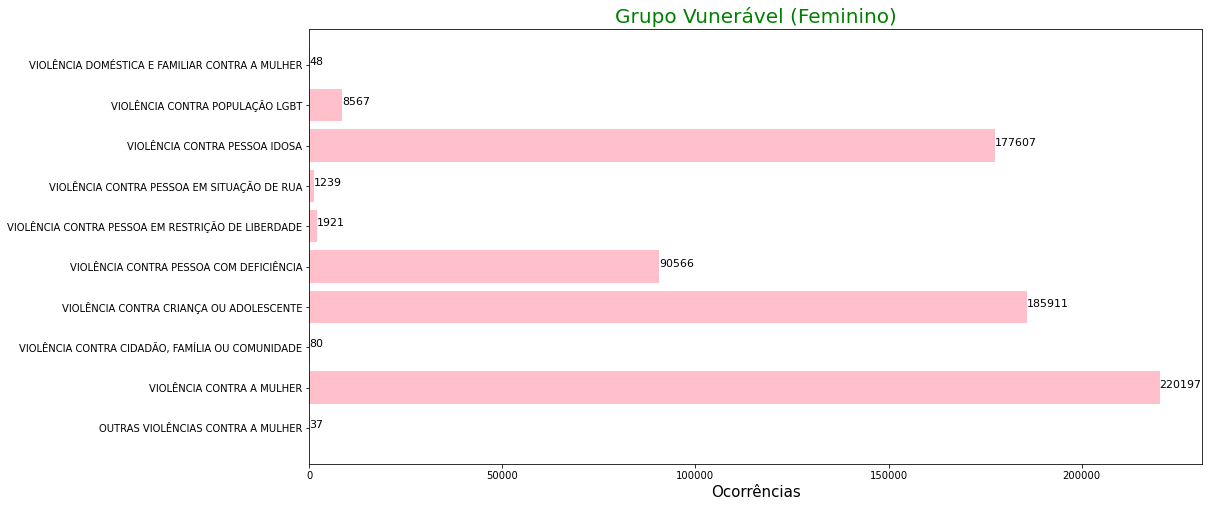

In [244]:
g = df.groupby(['Grupo_vulnerável','Sexo_da_vítima'])['Canal_de_atendimento'].count().reset_index()
m = g[(g['Sexo_da_vítima'] == 'FEMININO')]
plt.figure(figsize=(16, 8))
plt.barh(m['Grupo_vulnerável'], m['Canal_de_atendimento'], color='pink')
for index, value in enumerate(m['Canal_de_atendimento']):
    plt.text(value, index,str(value), size = 11)
plt.xlabel('Ocorrências', size = 15)
plt.title('Grupo Vunerável (Feminino)', color = 'green', size = 20)
plt.show()

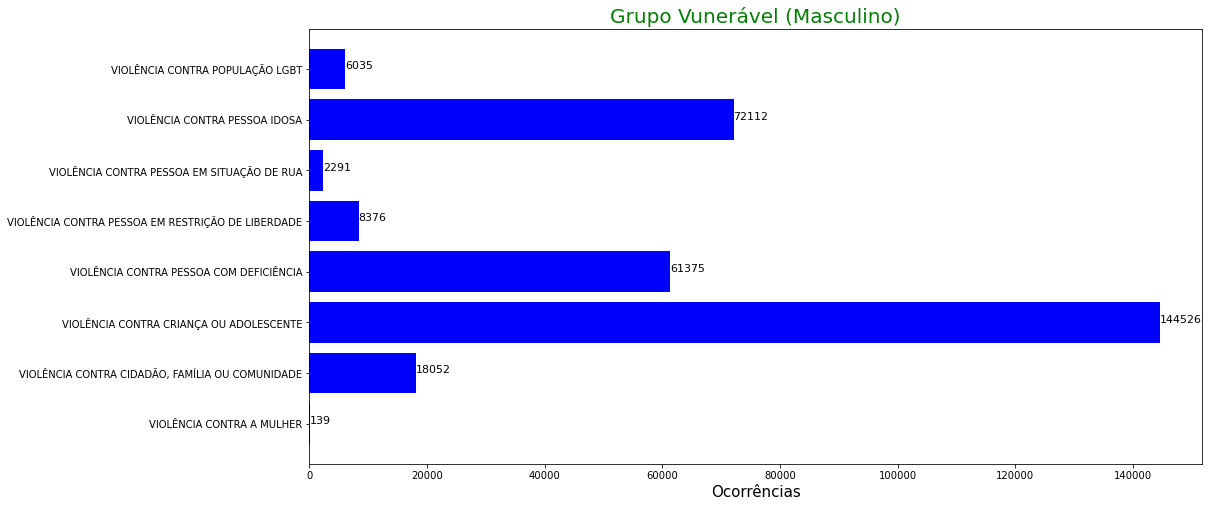

In [243]:
g = df.groupby(['Grupo_vulnerável','Sexo_da_vítima'])['Canal_de_atendimento'].count().reset_index()
m = g[(g['Sexo_da_vítima'] == 'MASCULINO')]
plt.figure(figsize=(16, 8))
plt.barh(m['Grupo_vulnerável'], m['Canal_de_atendimento'], color='blue')
for index, value in enumerate(m['Canal_de_atendimento']):
    plt.text(value, index,str(value), size = 11)
plt.xlabel('Ocorrências', size = 15)
plt.title('Grupo Vunerável (Masculino)', color = 'green', size = 20)
plt.show()

In [8]:
renda = df[df['Faixa_de_renda_da_vítima'].notna()]
verify(renda,'Faixa_de_renda_da_vítima')

Dados Faltantes:  0

 MAIS DE 1/2 A 1 SALÁRIO MÍNIMO      79748
MAIS DE 1 A 2 SALÁRIOS MÍNIMOS      70323
ATÉ 1/2 SALÁRIO MÍNIMO              53242
SEM RENDIMENTO                      44646
MAIS DE 2 A 5 SALÁRIOS MÍNIMOS      37275
MAIS DE 5 A 10 SALÁRIOS MÍNIMOS      9119
MAIS DE 10 A 20 SALÁRIOS MÍNIMOS     2572
MAIS DE 20 SALÁRIOS MÍNIMOS          1019
ATÉ 1 SM                               23
Name: Faixa_de_renda_da_vítima, dtype: int64

Descrição dos dados:
 count                             297967
unique                                 9
top       MAIS DE 1/2 A 1 SALÁRIO MÍNIMO
freq                               79748
Name: Faixa_de_renda_da_vítima, dtype: object


In [274]:
h = renda.groupby(['UF','Faixa_de_renda_da_vítima'])['Canal_de_atendimento'].count().reset_index()
pobreza = h[h['Faixa_de_renda_da_vítima'] == 'SEM RENDIMENTO']
pobreza = pobreza.drop(index=[32,56])

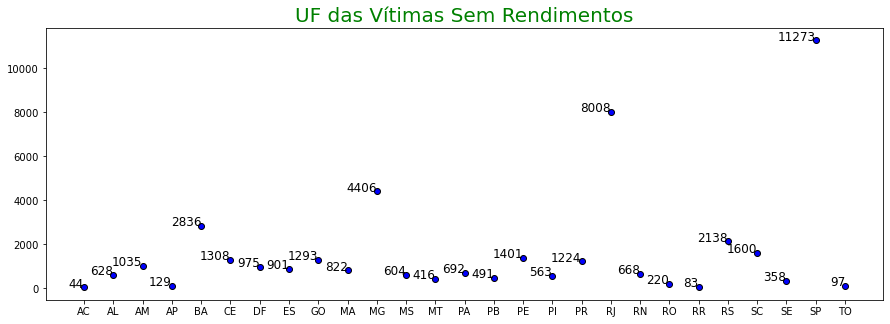

In [276]:
x = pobreza['UF'].tolist()
y = pobreza['Canal_de_atendimento'].tolist()
labels = pobreza['Canal_de_atendimento'].tolist()

plt.figure(figsize=(15, 5))
plt.scatter(x, y, color='blue', marker='o', cmap='viridis', edgecolor='black')
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=12, ha='right')

plt.title("UF das Vítimas Sem Rendimentos", size = 20, color = 'green')
plt.show()

In [12]:
h = renda.groupby(['UF','Faixa_de_renda_da_vítima'])['Canal_de_atendimento'].count().reset_index()
pobreza = h[h['Faixa_de_renda_da_vítima'] == 'MAIS DE 20 SALÁRIOS MÍNIMOS']
pobreza.drop(index = 54, inplace = True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
pobreza.head()

,UF,Faixa_de_renda_da_vítima,Canal_de_atendimento
20,AM,MAIS DE 20 SALÁRIOS MÍNIMOS,2
38,BA,MAIS DE 20 SALÁRIOS MÍNIMOS,68
46,CE,MAIS DE 20 SALÁRIOS MÍNIMOS,22
62,DF,MAIS DE 20 SALÁRIOS MÍNIMOS,85
70,ES,MAIS DE 20 SALÁRIOS MÍNIMOS,51


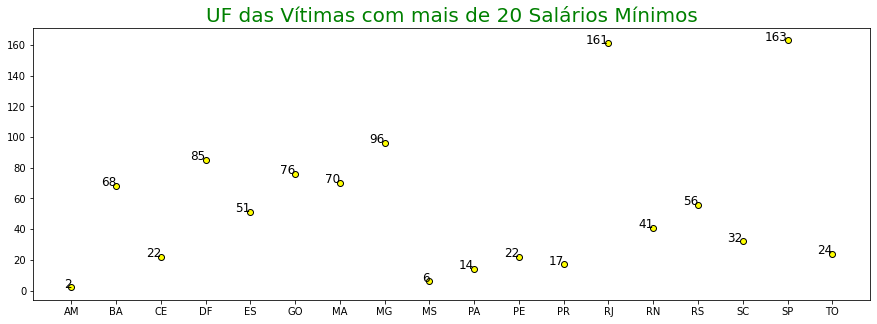

In [14]:
x = pobreza['UF'].tolist()
y = pobreza['Canal_de_atendimento'].tolist()
labels = pobreza['Canal_de_atendimento'].tolist()

plt.figure(figsize=(15, 5))
plt.scatter(x, y, color='yellow', marker='o', cmap='viridis', edgecolor='black')
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=12, ha='right')
#plt.xlabel('INÍCIO DAS VIOLAÇÕES')
#plt.ylabel('OCORRÊNCIAS')
plt.title("UF das Vítimas com mais de 20 Salários Mínimos", size = 20, color = 'green')
plt.show()

In [16]:
df.head()

,UF,Canal_de_atendimento,Cenário_da_violação,Município,Frequência,Início_das_violações,Grupo_vulnerável,Relação_vítima_suspeito,Sexo_da_vítima,Faixa_etária_da_vítima,Deficiência_da_vítima,Sexo_do_suspeito,Faixa_etária_do_suspeito,Profissão_da_vítima,Grau_de_instrução_da_vítima,Faixa_de_renda_da_vítima,Faixa_de_renda_do_suspeito,violacao
0,SP,TELEFÔNICO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,355030 | SÃO PAULO,DIARIAMENTE,HÁ MAIS DE SEIS MESES,VIOLÊNCIA CONTRA PESSOA IDOSA,ESPOSA(O),MASCULINO,80 A 84 ANOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA
1,ES,TELEFÔNICO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,320530 | VITÓRIA,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA A MULHER,FILHO(A),FEMININO,55 A 59 ANOS,NaN,NÃO INFORMADO,25 A 29 ANOS,NaN,ENSINO MÉDIO INCOMPLETO,MAIS DE 5 A 10 SALÁRIOS MÍNIMOS,NaN,INTEGRIDADE>FÍSICA>MAUS TRATOS
2,PR,TELEFÔNICO,CASA DA VÍTIMA,410690 | CURITIBA,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA PESSOA COM DEFICIÊNCIA,MÃE,MASCULINO,02 ANOS,MENTAL/INTELECTUAL,FEMININO,NaN,NaN,NaN,NaN,NaN,DIREITOS SOCIAIS>PROTEÇÃO À INFÂNCIA
3,SP,WHATSAPP,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,350950 | CAMPINAS,DIARIAMENTE,HÁ MAIS DE UM ANO,VIOLÊNCIA CONTRA PESSOA IDOSA,ESPOSA(O),FEMININO,85 A 89 ANOS,NaN,MASCULINO,80 A 84 ANOS,NÃO SABE INFORMAR,NaN,NaN,NaN,INTEGRIDADE>NEGLIGÊNCIA
4,BA,WHATSAPP,CASA DO SUSPEITO,291840 | JUAZEIRO,NÃO SABE INFORMAR,HÁ MAIS DE DEZ ANOS,VIOLÊNCIA CONTRA A MULHER,PAI,FEMININO,40 A 44 ANOS,NaN,MASCULINO,75 A 79 ANOS,NaN,SUPERIOR INCOMPLETO,NaN,NaN,LIBERDADE>SEXUAL>FÍSICA>ESTUPRO


- Inspeção na Coluna Violação

In [18]:
verify(df, 'violacao')

Dados Faltantes:  0

 INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE                                                          102341
INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA                                                                   98495
INTEGRIDADE>FÍSICA>MAUS TRATOS                                                                          91827
INTEGRIDADE>NEGLIGÊNCIA                                                                                 83268
INTEGRIDADE>PSÍQUICA>CONSTRANGIMENTO                                                                    76634
                                                                                                        ...  
IGUALDADE>INJÚRIA RACIAL,IGUALDADE>RACISMO                                                                  1
INTEGRIDADE>PSÍQUICA>ASSÉDIO MORAL,INTEGRIDADE>PSÍQUICA>CALÚNIA,INTEGRIDADE>PSÍQUICA                        1
SEGURANÇA>ECONÔMICA                                                                               

In [21]:
v = df.groupby(['UF','violacao'])['Canal_de_atendimento'].count().reset_index()
v

,UF,violacao,Canal_de_atendimento
0,AC,DIREITOS CIVIS E POLÍTICOS>ACESSO À INFORMAÇÃO,2
1,AC,DIREITOS CIVIS E POLÍTICOS>CULTURAL,4
2,AC,DIREITOS CIVIS E POLÍTICOS>LIVRE EXERCÍCIO DO ...,1
3,AC,DIREITOS CIVIS E POLÍTICOS>PARTICIPAÇÃO/DEMOCR...,1
4,AC,DIREITOS CIVIS E POLÍTICOS>PROPRIEDADE>PATRIMÔ...,9
...,...,...,...
2385,TO,VIDA>AUTOMUTILAÇAO,1
2386,TO,VIDA>FEMINICÍDIO,1
2387,TO,VIDA>HOMICÍDIO,2
2388,TO,VIDA>INCITAÇÃO AO SUICÍDIO,1


In [23]:
v2 = v[v['violacao'] == 'INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE']
v2.drop(index = [280,523], inplace = True)
v2

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,UF,violacao,Canal_de_atendimento
22,AC,INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE,265
80,AL,INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE,1165
157,AM,INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE,1912
231,AP,INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE,167
346,BA,INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE,5072
440,CE,INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE,3531
608,DF,INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE,2247
699,ES,INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE,2043
793,GO,INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE,2887
882,MA,INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE,1636


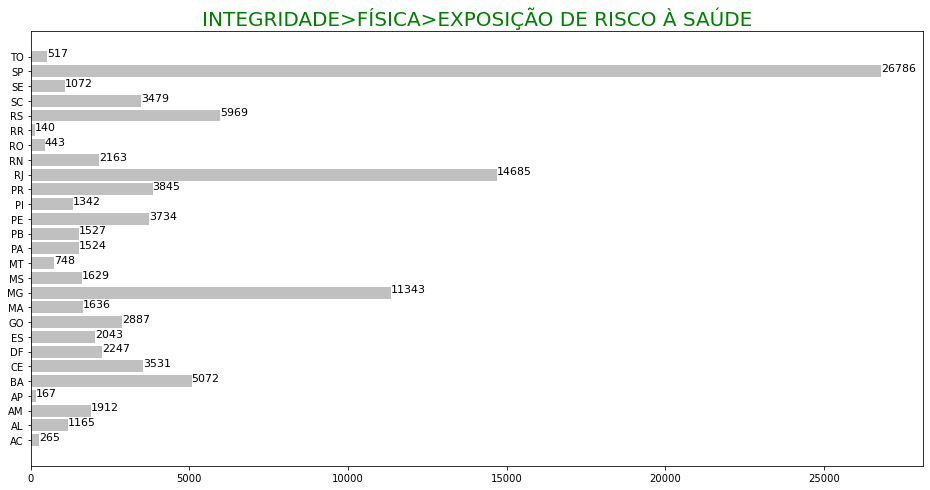

In [25]:
plt.figure(figsize=(16, 8))
plt.barh(v2['UF'], v2['Canal_de_atendimento'], color='silver')
for index, value in enumerate(v2['Canal_de_atendimento']):
    plt.text(value, index,str(value), size = 11)
plt.title('INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE', color = 'green', size = 20)
plt.show()

<h1> Observações Gerais sobre os dados</h1>
<p> Em todos os filtros gerados é possível verificar que as 3 cidades (SP,RJ,MG) da região Sudeste apresentam relevante impacto em relação ao Brasil como um todo.</p>
<p>Juntos esses 3 estados representam cerca de 52% de todas as ocorrências.</p>
<p>Juntos os 3 estados representam cerca de 42% da população segundo o IBGE Link -> https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/37237-de-2010-a-2022-populacao-brasileira-cresce-6-5-e-chega-a-203-1-milhoes#:~:text=Em%201%C2%BA%20de%20agosto%20de,Brasil%20tinha%20203.062.512%20habitantes.</p>
<p>O grau de instrução da vítima que mais sofre violações é a de (Ensino Fundamental incompleto)</p>
<p>O sexo que mais sofre violência são mulheres e o sexo dos suspeito representam em torno de (51% Masculino e 44% Feminino)</p>
<p>O canal de atendimento mais utilizado é o telefônico e o dia da semana que mais apresentam registros de ocorrência é a Segunda-Feira</p>
<p>O principal lugar onde ocorre a violência é casa onde a vítima mora com o suspeito, em torno de 60%</p>
<p>De todos os registros cerca de 70% são de violações que ocorrem diariamente</p>
<p>A maior quantidade de registros para violação foram as seguintes -> (INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE)</p>
</br>
<p>Algumas colunas possuem dados faltantes, então foi necessário realizar o tratamento dos dados. Outras colunas não foram utilizadas pois, não eram de interesse da pesquisa ou não tinham dados suficiente.</p>
<p>A base de dados possue 1048575 linhas × 66 colunas</p>
